## E-Commerce

ElecKart is a leading e-commerce chain based in Ontario, Canada, specialising in electronic products. The company follows the marketplace model and acts as a platform where buyers and sellers can interact with each other. Sellers can put various products on the website, and buyers purchase these products from them.

The brand has shown commendable growth in just a few years of its operation. However, over the last one year, ElecKart has faced a revenue dip even after spending a significant amount of money on marketing and promotions. There was a high customer churn ratio because the company was failing to understand customer demographics and cater to the needs of their customers.

As a data scientist or an analyst working for ElecKart, we need to develop a market mix model based on the given information and the data sets related to consumer purchases, monthly spends on advertising channels, climatic information and the NPS/stock index.

# -> Importing Libraries








In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Set ipython's max row display
pd.set_option('display.max_row', 500)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)

# -> Importing Data

In [4]:
CE = pd.read_csv('ConsumerElectronics.csv')

In [5]:
CE.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units deliverybdays deliverycdays  \
0   3.419301e+15  6400      1            \N            \N   
1   1.420831e+15  6900      1            \N            \N   
2   2.421913e+15  1990      1            \N            \N   
3   4.416592e+15  1690      1            \N            \N   
4   4.419525e+15  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [6]:
CE.shape

(1648824, 20)

In [7]:
CE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [8]:
CE.describe()

Year         Month      order_id  order_item_id         units  \
count  1.648824e+06  1.648824e+06  1.648824e+06   1.648824e+06  1.648824e+06   
mean   2.015519e+03  6.585650e+00  2.842445e+15   1.375628e+16  1.022087e+00   
std    4.996557e-01  3.623351e+00  1.269134e+15   5.594598e+16  2.535318e-01   
min    2.015000e+03  1.000000e+00  7.633152e+07   1.080165e+08  1.000000e+00   
25%    2.015000e+03  3.000000e+00  1.602589e+15   1.606725e+15  1.000000e+00   
50%    2.016000e+03  6.000000e+00  2.611825e+15   2.619185e+15  1.000000e+00   
75%    2.016000e+03  1.000000e+01  3.610614e+15   4.397706e+15  1.000000e+00   
max    2.016000e+03  1.200000e+01  5.395077e+15   3.000373e+17  5.000000e+01   

                sla   product_mrp  product_procurement_sla  
count  1.648824e+06  1.648824e+06             1.648824e+06  
mean   5.687832e+00  4.108309e+03             5.403451e+00  
std    2.983336e+00  8.510918e+03             5.346618e+01  
min    0.000000e+00  0.000000e+00            -1.000000e+00  
25%    4.000000e+00  7.990000e+02             1.000000e+00  
50%    6.000000e+00  1.599000e+03             2.000000e+00  
75%    7.000000e+00  3.499000e+03             3.000000e+00  
max    1.006000e+03  2.999990e+05             1.000000e+03

# -> Data Cleaning and Preparation

In [9]:
#Percentage of duplicate records
print(round((CE.duplicated().value_counts()[1]/CE.shape[0])*100,2))

6.36


In [10]:
#Removing duplicate records
CE.drop_duplicates(keep='first', inplace=True)

In [11]:
CE.shape

(1543981, 20)

In [12]:
CE = CE[(CE.product_analytic_sub_category == 'CameraAccessory') | (CE.product_analytic_sub_category == 'HomeAudio') | (CE.product_analytic_sub_category == 'GamingAccessory')  ]

In [13]:
#Changing data type of order date
CE.order_date = pd.to_datetime(CE.order_date)


In [14]:
CE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528642 entries, 0 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           528642 non-null  object        
 1   order_date                       528642 non-null  datetime64[ns]
 2   Year                             528642 non-null  int64         
 3   Month                            528642 non-null  int64         
 4   order_id                         528642 non-null  float64       
 5   order_item_id                    528642 non-null  float64       
 6   gmv                              528642 non-null  object        
 7   units                            528642 non-null  int64         
 8   deliverybdays                    528642 non-null  object        
 9   deliverycdays                    528642 non-null  object        
 10  s1_fact.order_payment_type       528642 non

In [15]:
#Removing rows having date not in range
CE = CE.loc[(CE.order_date >= '2015-07-01')]
CE = CE.loc[(CE.order_date < '2016-07-01')]

In [16]:
CE['Date'] = CE.order_date.dt.date

In [17]:
CE.replace(r'^\s+$', np.nan, regex=True, inplace = True)
CE.replace('\\N', np.nan, inplace = True)

In [18]:
# let's check the null percentage for each column
round(100*(CE.isnull().sum()/len(CE.index)), 2)

fsn_id                              0.00
order_date                          0.00
Year                                0.00
Month                               0.00
order_id                            0.00
order_item_id                       0.00
gmv                                 0.26
units                               0.00
deliverybdays                      77.85
deliverycdays                      77.85
s1_fact.order_payment_type          0.00
sla                                 0.00
cust_id                             0.26
pincode                             0.26
product_analytic_super_category     0.00
product_analytic_category           0.00
product_analytic_sub_category       0.00
product_analytic_vertical           0.00
product_mrp                         0.00
product_procurement_sla             0.00
Date                                0.00
dtype: float64

In [19]:
#Removing null cust_id and pincode
CE = CE[~CE.cust_id.isnull()]

# Dropping deliverybdays and deliverycdays columns since it contains null value percentage

CE.drop(['deliverybdays','deliverycdays'],axis=1,inplace=True)

In [20]:
# let's check the null percentage for each column again
round(100*(CE.isnull().sum()/len(CE.index)), 2)

fsn_id                             0.0
order_date                         0.0
Year                               0.0
Month                              0.0
order_id                           0.0
order_item_id                      0.0
gmv                                0.0
units                              0.0
s1_fact.order_payment_type         0.0
sla                                0.0
cust_id                            0.0
pincode                            0.0
product_analytic_super_category    0.0
product_analytic_category          0.0
product_analytic_sub_category      0.0
product_analytic_vertical          0.0
product_mrp                        0.0
product_procurement_sla            0.0
Date                               0.0
dtype: float64

In [21]:
CE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527080 entries, 0 to 1542378
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           527080 non-null  object        
 1   order_date                       527080 non-null  datetime64[ns]
 2   Year                             527080 non-null  int64         
 3   Month                            527080 non-null  int64         
 4   order_id                         527080 non-null  float64       
 5   order_item_id                    527080 non-null  float64       
 6   gmv                              527080 non-null  object        
 7   units                            527080 non-null  int64         
 8   s1_fact.order_payment_type       527080 non-null  object        
 9   sla                              527080 non-null  int64         
 10  cust_id                          527080 non

In [22]:
#Treating incorrect product mrp
CE.gmv = CE.gmv.astype('float')

CE['product_mrp'] = np.where( (CE['gmv']/CE['units']) > CE['product_mrp'] ,(CE['gmv']/CE['units']), CE['product_mrp'])

In [23]:
#Removing rows having product_mrp as 0 because product mrp can never be zero
CE = CE[~(CE.product_mrp <= 0)]

In [24]:
CE[CE.gmv == 0]['gmv'].count()

261

gmv can be zero if their will be 100% Discount

In [25]:
#Dropping insignificant columns with single unique values and can't be used for analysis

CE.drop(['product_analytic_super_category'],axis=1,inplace=True)

In [26]:
#Changing the name of the column s1_fact.order_payment_type
CE.rename(columns={'s1_fact.order_payment_type':'order_payment_type'}, inplace=True)

In [27]:
CE[['sla','product_procurement_sla']].quantile([0.0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])


sla  product_procurement_sla
0.00   0.0                     -1.0
0.25   4.0                      2.0
0.50   6.0                      2.0
0.75   7.0                      3.0
0.90   9.0                      5.0
0.95  11.0                      5.0
0.99  14.0                      6.0
1.00  60.0                     15.0

In [28]:
#number of values having negative product_procurement_sla
CE[CE.product_procurement_sla < 0]['product_procurement_sla'].value_counts()

-1    13797
Name: product_procurement_sla, dtype: int64

In [29]:
#conversting negative product_procurement_sla values to positive
CE.product_procurement_sla = abs(CE.product_procurement_sla)


In [30]:
#Replacing outliers with 99th percentile value instead of removing those rows
CE["sla"] = np.where(CE["sla"] > CE.sla.quantile(0.99), CE.sla.quantile(0.99), CE.sla)
CE["product_procurement_sla"] = np.where(CE["product_procurement_sla"] > CE.product_procurement_sla.quantile(0.99), CE.product_procurement_sla.quantile(0.99), CE.product_procurement_sla)


In [31]:
#Dropping columns which can't be used for analysis further
CE.drop(['fsn_id','order_id','order_item_id','cust_id','pincode'],axis=1,inplace=True)

In [32]:
#Creating week number
CE['week'] = np.where(CE.Year == 2015, (CE.order_date.dt.week - pd.to_datetime('2015-07-01').week + 1), CE.order_date.dt.week+27)

#As per ISO standard, dates like 2016-01-01 will be 53rd week, hence their value is 53+27=80
#Converting those values as week 27

CE.week = np.where(CE.week == 80,27,CE.week)

# -> Feature engineering and KPI

In [33]:
#Creating column List price
CE['List_price'] = CE.gmv/CE.units

In [34]:
#Creating Discount column
CE['Discount'] = ((CE.product_mrp - CE.List_price)/CE.product_mrp)*100

In [35]:
#Creating pay date column
CE['pay_date'] = CE.order_date.dt.day.apply(lambda x: 1 if x == 1 or x == 15 else 0)


National Holidays in Canada between July 2015 to June 2016

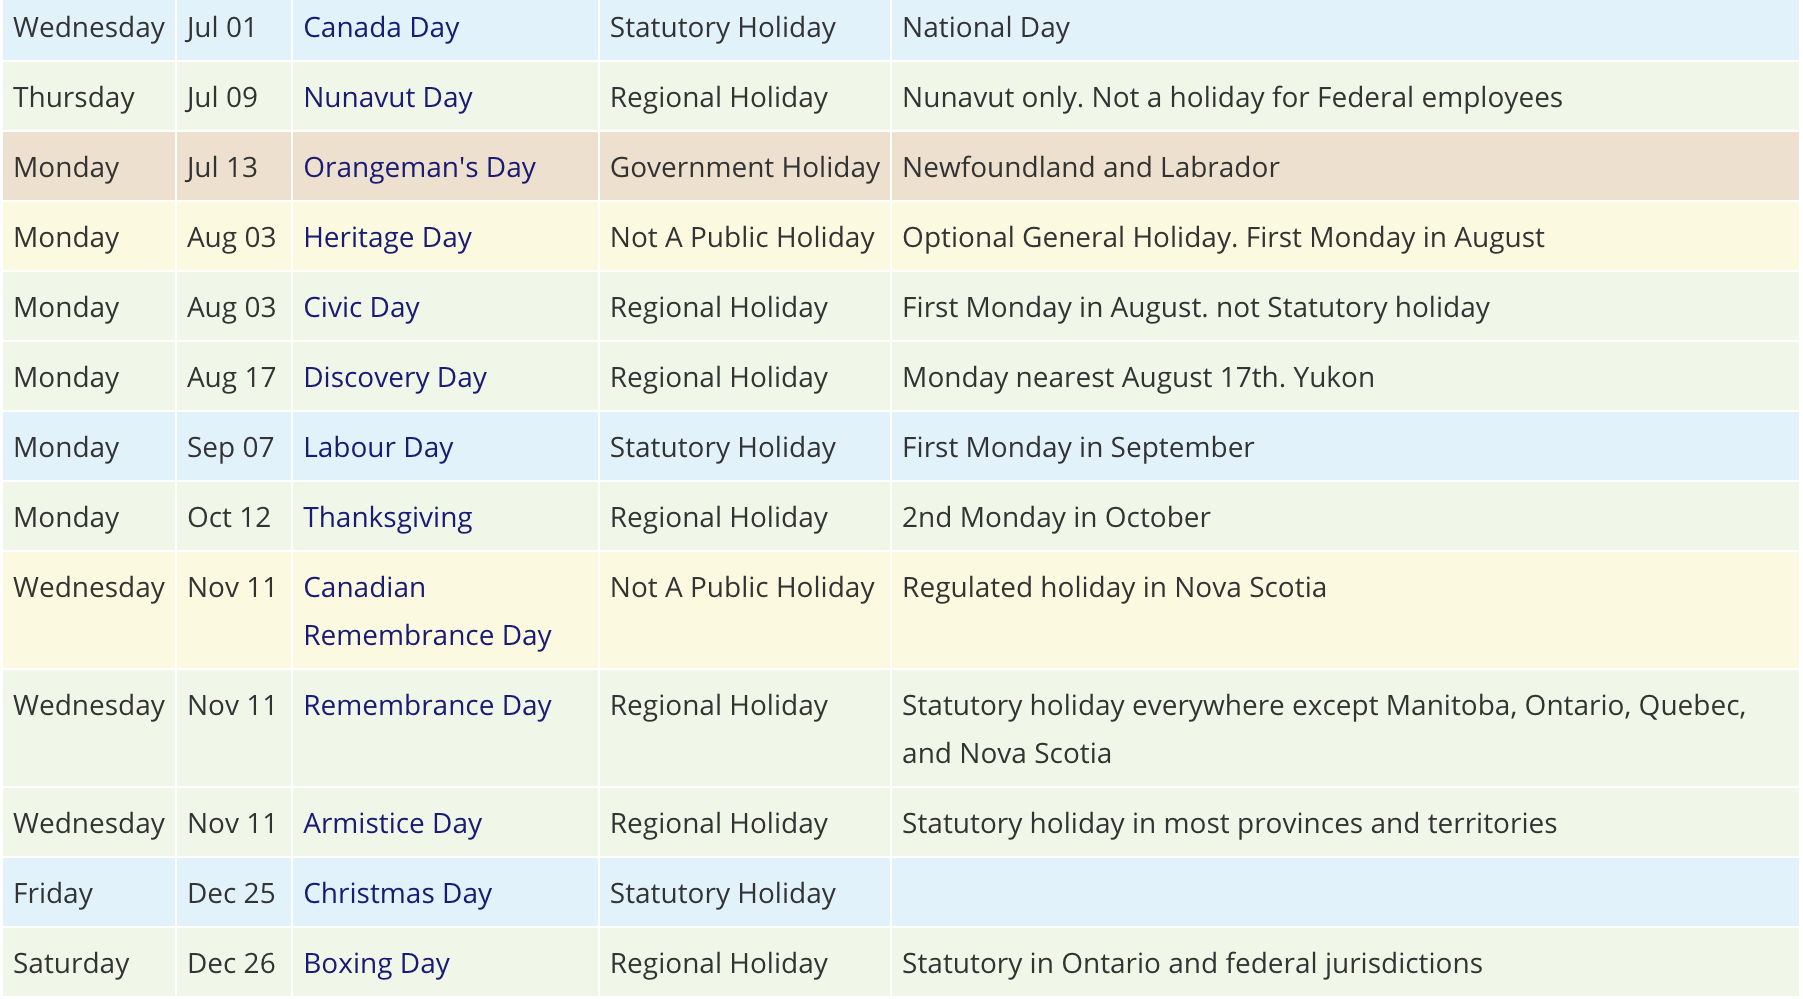



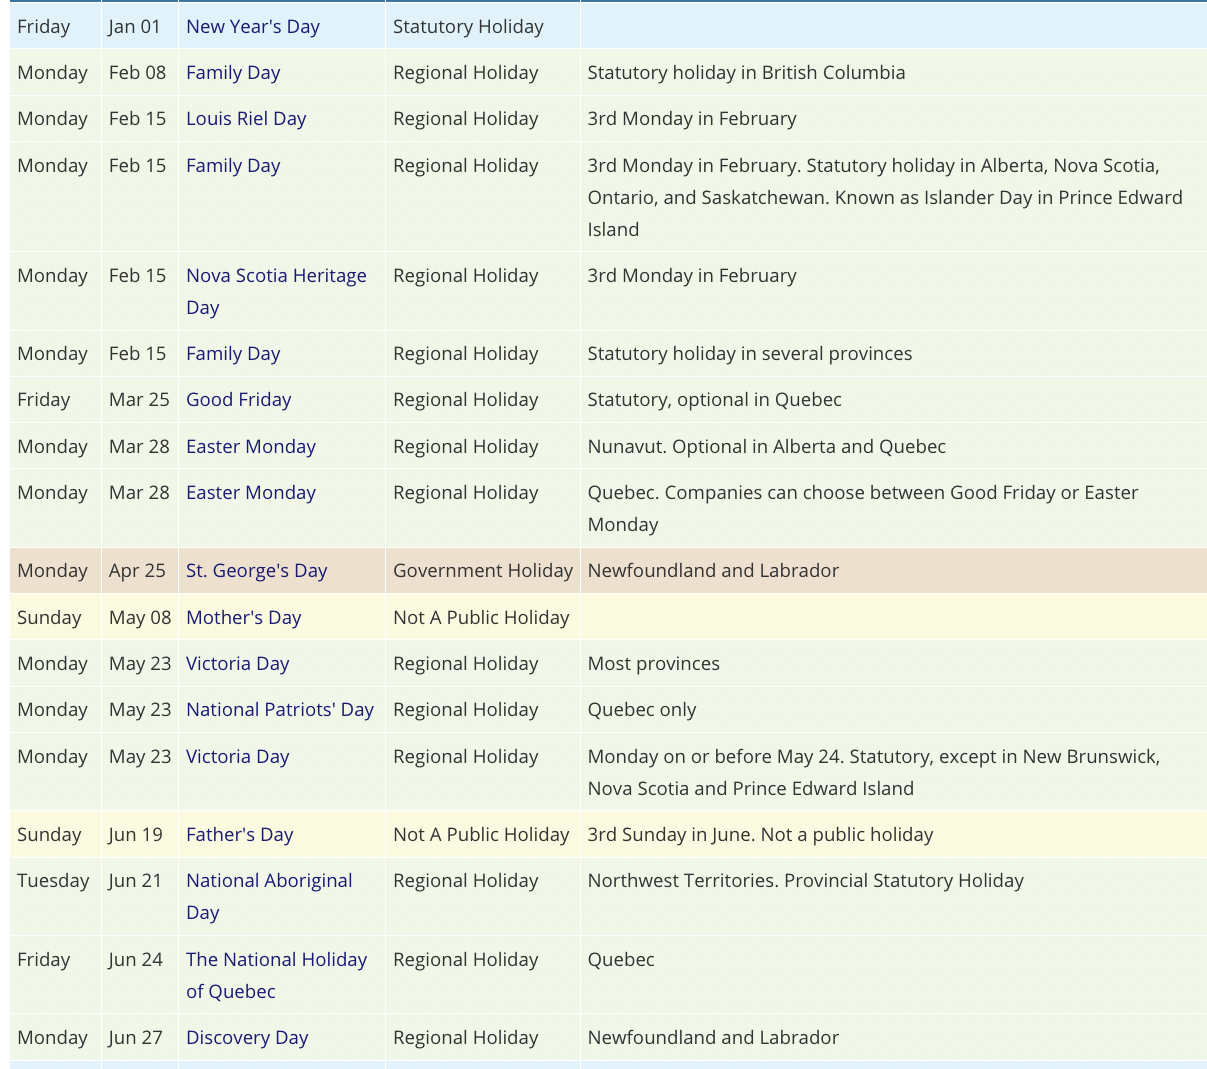

Reference Link: https://www.officeholidays.com/countries/canada/

In [36]:
#Creating holiday column
Holidays = ["2015-07-01","2015-07-09","2015-07-13",
                      "2015-08-03","2015-08-17",
                      "2015-09-07","2015-10-12",
                      "2015-11-11",
                      "2015-12-25","2015-12-26",
                      "2016-01-01",
                      "2016-02-08","2016-02-15",
                      "2016-03-25","2016-03-28","2016-04-25",
                      "2016-05-08","2016-05-23",
                      "2016-06-19","2016-06-21","2016-06-24","2016-06-27"]

Holiday = pd.DataFrame(Holidays,columns = ['Date'])
Holiday['Date'] = pd.to_datetime(Holiday['Date']).dt.date
Holiday['holiday'] = 1

CE = CE.merge(Holiday,left_on='Date',right_on='Date',how='left')

CE.holiday.fillna(0,inplace=True)

In [37]:
#Creating luxury and mass market product, if gmv is greater than 80th percentile of gmv then luxury product otherwise mass market product
CE['Premium Product'] = np.where(CE.gmv >= CE.gmv.quantile(.80),1,0)


## -> Importing Climate data

In [38]:
# Ontario Climate data of year 2015-2016 
climate_2015 = pd.read_excel('ONTARIO-2015.xlsx',skiprows=24)
climate_2016 = pd.read_excel('ONTARIO-2016.xlsx',skiprows=24)

In [39]:
climate = climate_2015.append(climate_2016)
climate.head()

Date/Time    Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2015-01-01  2015.0    1.0  1.0            †            0.0           NaN   
1 2015-01-02  2015.0    1.0  2.0            †            3.0           NaN   
2 2015-01-03  2015.0    1.0  3.0            †            2.5           NaN   
3 2015-01-04  2015.0    1.0  4.0            †            2.5           NaN   
4 2015-01-05  2015.0    1.0  5.0            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0           -8.5           NaN            -4.3            NaN   
1           -3.0           NaN             0.0            NaN   
2           -4.0           NaN            -0.8            NaN   
3            0.0           NaN             1.3            NaN   
4          -13.5           NaN           -11.8            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                22.3                NaN                 0.0   
1                18.0                NaN                 0.0   
2                18.8                NaN                 0.0   
3                16.7                NaN                 0.0   
4                29.8                NaN                 0.0   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              0.0             NaN              0.0   
1                NaN              0.0             NaN              0.0   
2                NaN             24.0             NaN              0.0   
3                NaN              0.0             NaN              1.0   
4                NaN              0.0             NaN              3.0   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                0.0               NaN                0.0   
1             NaN                0.0               NaN                0.0   
2             NaN               24.0               NaN                0.0   
3             NaN                1.0               NaN                0.0   
4             NaN                3.0               NaN                1.0   

  Snow on Grnd Flag  Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0               NaN                        NaN                   NaN   
1               NaN                        NaN                   NaN   
2               NaN                        NaN                   NaN   
3               NaN                        NaN                   NaN   
4               NaN                        NaN                   NaN   

   Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     NaN                   NaN  
1                     NaN                   NaN  
2                     NaN                   NaN  
3                     NaN                   NaN  
4                     NaN                   NaN

In [40]:
climate=climate[(climate['Month'] >= 7) & (climate['Year'] == 2015) | (climate['Month'] <= 6) & (climate['Year'] == 2016)]

In [41]:
#Creating the week number
climate['week'] = np.where(climate.Year == 2015, climate['Date/Time'].dt.week - pd.to_datetime('2015-07-01').week + 1 , climate['Date/Time'].dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27

climate.week = np.where(climate.week == 80,27,climate.week)

In [42]:
# let's check the null percentage for each column in Climate data of 2015
round(100*(climate.isnull().sum()/len(climate.index)), 2)

Date/Time                      0.00
Year                           0.00
Month                          0.00
Day                            0.00
Data Quality                  41.26
Max Temp (°C)                 43.17
Max Temp Flag                 98.09
Min Temp (°C)                 47.81
Min Temp Flag                 93.44
Mean Temp (°C)                47.81
Mean Temp Flag                93.44
Heat Deg Days (°C)            47.81
Heat Deg Days Flag            93.44
Cool Deg Days (°C)            47.81
Cool Deg Days Flag            93.44
Total Rain (mm)               41.26
Total Rain Flag               98.09
Total Snow (cm)               41.26
Total Snow Flag               98.36
Total Precip (mm)             41.26
Total Precip Flag             96.99
Snow on Grnd (cm)             41.26
Snow on Grnd Flag             98.36
Dir of Max Gust (10s deg)    100.00
Dir of Max Gust Flag         100.00
Spd of Max Gust (km/h)       100.00
Spd of Max Gust Flag         100.00
week                        

In [43]:
#Removing columns having high null values or not required
climate.drop(['Year','Month','Day','Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag',
'Total Rain Flag','Total Snow Flag','Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
'Spd of Max Gust (km/h)','Spd of Max Gust Flag'],axis=1,inplace=True)

In [44]:
climate[['Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)']] = climate[['Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)']].fillna(0)

In [45]:
climate[['Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)']] = climate[['Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)']].fillna(method='ffill')

In [46]:
#Incorrect mean temperature
climate[climate['Mean Temp (°C)'] > (climate['Min Temp (°C)'] + climate['Max Temp (°C)'])/2].head(5)

Date/Time  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
181 2015-07-01           24.5           17.0            20.8   
188 2015-07-08           20.0           12.5            16.3   
191 2015-07-11           28.0           13.5            20.8   
194 2015-07-14           29.0           19.5            24.3   
199 2015-07-19           33.0           21.5            27.3   

     Heat Deg Days (°C)  Cool Deg Days (°C)  Total Rain (mm)  Total Snow (cm)  \
181                 0.0                 2.8              0.0              0.0   
188                 1.7                 0.0             14.4              0.0   
191                 0.0                 2.8              0.0              0.0   
194                 0.0                 6.3              1.8              0.0   
199                 0.0                 9.3              0.0              0.0   

     Total Precip (mm)  Snow on Grnd (cm)  week  
181                0.0                0.0     1  
188               14.4                0.0     2  
191                0.0                0.0     2  
194                1.8                0.0     3  
199                0.0                0.0     3

In [47]:
climate['Date'] = climate['Date/Time'].dt.date

In [48]:
#Correcting the Mean Temp value
climate['Mean Temp (°C)'] = (climate['Min Temp (°C)'] + climate['Max Temp (°C)'])/2

## -> Importing Marketing data

In [49]:
#Media Investment data
Media_Investment = pd.read_excel('Media data and other information.xlsx',skiprows=2,skipfooter = 4,sheet_name='Media Investment')
Media_Investment.drop('Unnamed: 0',axis=1,inplace=True)


In [50]:
#filling null investment for any month with zero
Media_Investment.fillna(0,inplace=True)

In [51]:
Media_Investment.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1  2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2  2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3  2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4  2015.0   11.0         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    0.0    0.0  
1           0.000006          0.129244     0.073684   2.513528    0.0    0.0  
2           0.610292         16.379990     5.038266   6.202149    0.0    0.0  
3           3.444075         24.371778     6.973711  31.927011    0.0    0.0  
4           0.168633         19.561574     6.595767   5.222032    0.0    0.0

In [52]:
#Creating AdStock of various media channels
for i in range(1,Media_Investment.shape[0]):       
  Media_Investment['TV'].iloc[i] = Media_Investment['TV'].iloc[i] + .60 * Media_Investment['TV'].iloc[i-1]
  Media_Investment['Digital'].iloc[i] = Media_Investment['Digital'].iloc[i] + .60 * Media_Investment['Digital'].iloc[i-1]
  Media_Investment['Sponsorship'].iloc[i] = Media_Investment['Sponsorship'].iloc[i] + .60 * Media_Investment['Sponsorship'].iloc[i-1]
  Media_Investment['Content Marketing'].iloc[i] = Media_Investment['Content Marketing'].iloc[i] + .60 * Media_Investment['Content Marketing'].iloc[i-1]
  Media_Investment['Online marketing'].iloc[i] = Media_Investment['Online marketing'].iloc[i] + .60 * Media_Investment['Online marketing'].iloc[i-1]
  Media_Investment[' Affiliates'].iloc[i] = Media_Investment[' Affiliates'].iloc[i] + .60 * Media_Investment[' Affiliates'].iloc[i-1]
  Media_Investment['SEM'].iloc[i] = Media_Investment['SEM'].iloc[i] + .60 * Media_Investment['SEM'].iloc[i-1]
  Media_Investment['Radio'].iloc[i] = Media_Investment['Radio'].iloc[i] + .60 * Media_Investment['Radio'].iloc[i-1]
  Media_Investment['Other'].iloc[i] = Media_Investment['Other'].iloc[i] + .60 * Media_Investment['Other'].iloc[i-1]


In [53]:
Media_Investment.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1  2015.0    8.0          5.064306  0.135636   2.797882     5.511894   
2  2015.0    9.0         96.254380  3.960885   3.035257    66.094787   
3  2015.0   10.0        170.156297  8.521242  14.443634   124.329404   
4  2015.0   11.0         51.216220  9.333375   9.941649    88.769758   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    0.0    0.0  
1           0.000566          0.925611     0.402036   5.527746    0.0    0.0  
2           0.610632         16.935356     5.279488   9.518797    0.0    0.0  
3           3.810454         34.532992    10.141404  37.638290    0.0    0.0  
4           2.454905         40.281369    12.680609  27.805005    0.0    0.0

In [54]:
#NPS Score data
NPS_Score = pd.read_excel('Media data and other information.xlsx',sheet_name='Monthly NPS Score')

In [55]:
NPS_Score

Unnamed: 0      July'15       Aug'15      Sept'15       Oct'15  Nov'15  \
0          NPS    54.599588    59.987101    46.925419    44.398389    47.0   
1  Stock Index  1177.000000  1206.000000  1101.000000  1210.000000  1233.0   

   Dec'15       Jan'16       Feb'16      Mar'16       Apr'16       May'16  \
0    45.8    47.093031    50.327406    49.02055    51.827605    47.306951   
1  1038.0  1052.000000  1222.000000  1015.00000  1242.000000  1228.000000   

       June'16  
0    50.516687  
1  1194.000000

In [56]:
NPS_Score.drop('Unnamed: 0',axis=1,inplace=True)
NPS_Score = NPS_Score.transpose()
NPS = list(NPS_Score[0])
Stock_Index = list(NPS_Score[1])

In [57]:
Marketing = Media_Investment
Marketing['NPS'] = NPS
Marketing['Stock Index'] = Stock_Index

In [58]:
#Merging it with consumer electronics data
CE = CE.merge(Marketing,left_on='Month',right_on='Month',how='left')

In [59]:
#Special Sales data
Special_Sales = pd.read_excel('Media data and other information.xlsx',sheet_name='Special Sale Calendar')
Special_Sales.drop('Unnamed: 0',axis=1,inplace=True)
Special_Sales.rename(columns = {'Unnamed: 1':'Year'},inplace=True)
Special_Sales.Year = Special_Sales.Year.fillna(method='ffill')

In [60]:
Special_Sales

Year               Sales Calendar
0   2015.0               (18-19th July)
1   2015.0                (15-17th Aug)
2   2015.0                (28-30th Aug)
3   2015.0                (15-17th Oct)
4   2015.0                 (7-14th Nov)
5   2015.0   (25th Dec'15 - 3rd Jan'16)
6   2016.0                  (20-22 Jan)
7   2016.0                    (1-2 Feb)
8   2016.0                  (20-21 Feb)
9   2016.0                  (14-15 Feb)
10  2016.0                    (7-9 Mar)
11  2016.0                  (25-27 May)

In [61]:
Special_Sales_List = ["2015-07-18","2015-07-19",
                      "2015-08-15","2015-08-16","2015-08-17",
                      "2015-08-28","2015-08-29","2015-08-30",
                      "2015-10-15","2015-10-16","2015-10-17",
                      "2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14",
                      "2015-12-25","2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03",
                      "2016-01-20","2016-01-21","2016-01-22",
                      "2016-02-01","2016-02-02",
                      "2016-02-14","2016-02-15",
                      "2016-02-20","2016-02-21",
                      "2016-03-07","2016-03-08","2016-03-09",
                      "2016-05-25","2016-05-26","2016-05-27"]

In [62]:
SS = pd.DataFrame(Special_Sales_List,columns = ['Date'])
SS['Date'] = pd.to_datetime(SS['Date']).dt.date
SS['Special_sales'] = 1

In [63]:
CE = CE.merge(SS,left_on='Date',right_on='Date',how='left')

In [64]:
CE.Special_sales.fillna(0,inplace=True)

# -> EDA

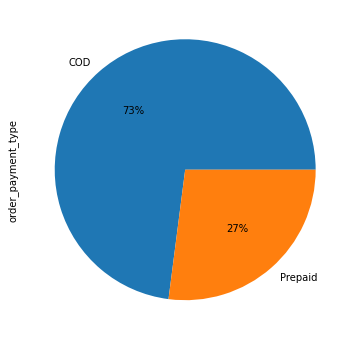

In [65]:
CE.order_payment_type.value_counts().plot.pie(autopct = "%1.0f%%",subplots=True, figsize=(11, 6))
plt.show()


Observation: Approx 73% customers prefer Cash on delivery which is more than 2 times of Prepaid orders.

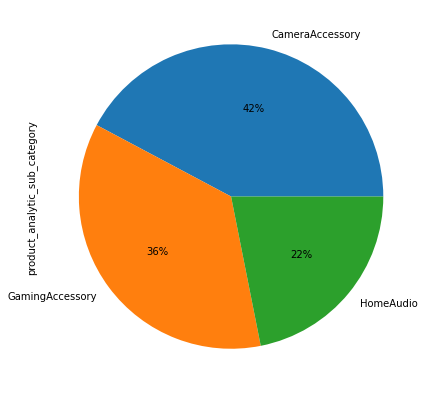

In [66]:
CE.product_analytic_sub_category.value_counts().plot.pie(autopct = "%1.0f%%",subplots=True, figsize=(11, 7))
plt.show()

Observation: Sales of Camera Accessory sub category is highest among all other sub categories.


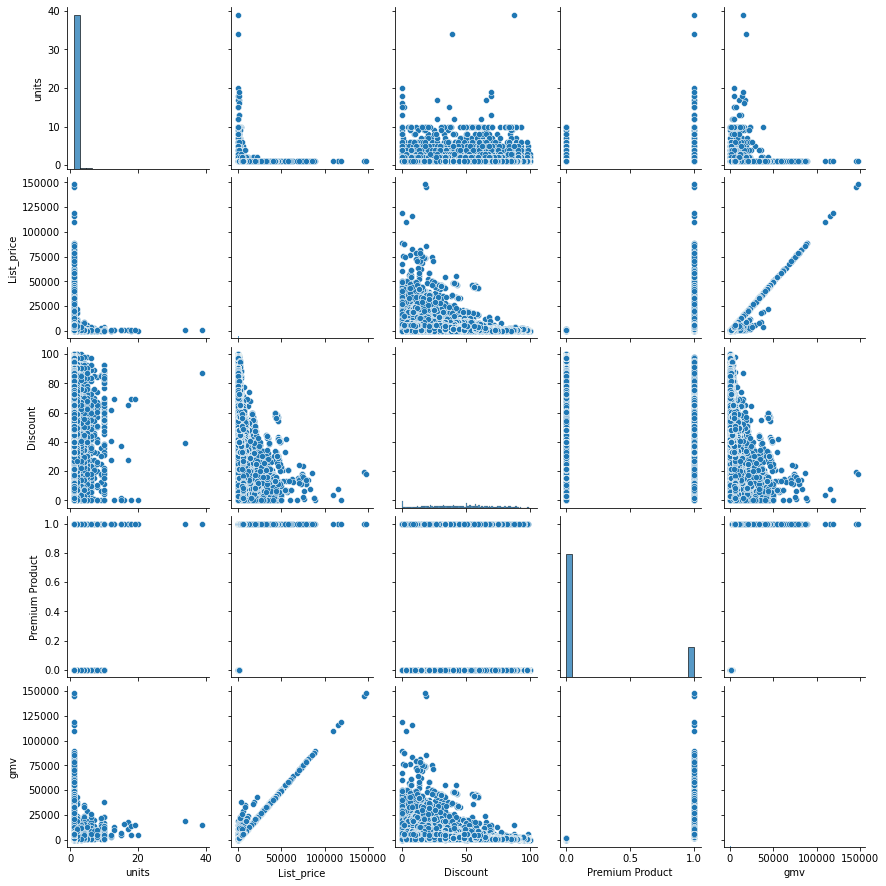

In [67]:
sns.pairplot(CE[[ 'units', 'List_price', 'Discount','Premium Product','gmv']])

Observation:

1.   Gross margin value is high when Discount value is between 10-20%, but beyond that it starts to declines. 
2.   For high list price products, lower Discounts to sustain value of those products.
3.   Gross margin value is high due to the premium products.




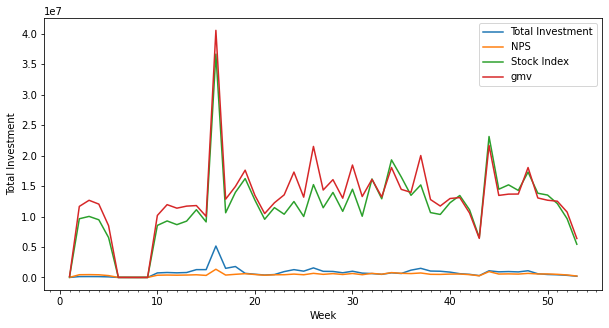

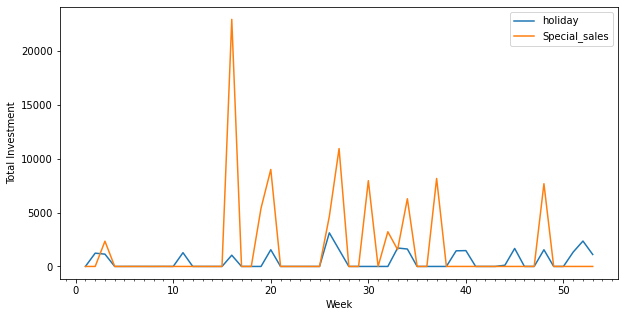

In [68]:
plt.figure(figsize=(10, 5), frameon='True')
plt.plot(CE[['Total Investment','NPS', 'Stock Index','gmv']].groupby(by=CE.week).sum())
plt.xlabel('Week', fontsize=10);
plt.ylabel('Total Investment', fontsize=10);
plt.legend(['Total Investment','NPS', 'Stock Index','gmv'])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.show()

plt.figure(figsize=(10, 5), frameon='True')
plt.plot(CE[['holiday','Special_sales']].groupby(by=CE.week).sum())
plt.xlabel('Week', fontsize=10);
plt.ylabel('Total Investment', fontsize=10);
plt.legend(['holiday','Special_sales'])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.show()

Observation:

*   During special sales between 15th to 17th week and also due to increase in total investment in marketing at that same time, there is a huge jump in the stock index of company at that time.
*   During week 42 of Thanksgiving, there is a sudden jump in revenue and Stock index due to proper media investment at that time.

# -> Aggregation

In [69]:
#Dropping not usefull columns in model building since we aggregate in weeks
CE.drop(['order_date','Year_x','Year_y','Date','Month'],axis=1,inplace=True)

## -> Camera Accessory

In [70]:
CA = CE[CE.product_analytic_sub_category == 'CameraAccessory']

In [71]:
#Dropping insignificant columns with single unique values and can't be used for analysis
CA.drop(['product_analytic_category','product_analytic_sub_category'],axis=1,inplace=True)

In [72]:
# Creating dummy variables for categorical variables
dummy= pd.get_dummies(CA[['order_payment_type','product_analytic_vertical']])

# Adding dummy variable to data set
CA= pd.concat([CA, dummy], axis=1)

CA.drop(['order_payment_type','product_analytic_vertical'],axis=1,inplace=True)

In [73]:
#Aggregating data to weekly level

CA_Week = pd.DataFrame(CA.groupby('week').agg({'gmv':'mean', 'units':'mean', 'order_payment_type_COD':'sum','order_payment_type_Prepaid':'sum', 'sla':'mean', 'product_mrp':'mean',
       'product_procurement_sla':'mean', 'List_price':'mean', 'Discount':'mean', 'pay_date':'sum',
       'holiday':'sum', 'Premium Product':'sum', 'Special_sales':'mean',
       'Total Investment':'mean', 'TV':'mean',
       'Digital':'mean', 'Sponsorship':'mean', 'Content Marketing':'mean', 'Online marketing':'mean',
       ' Affiliates':'mean', 'SEM':'mean', 'Radio':'mean', 'Other':'mean', 'NPS':'mean', 'Stock Index':'mean',
       'product_analytic_vertical_Binoculars':'mean',
       'product_analytic_vertical_CameraAccessory':'mean',
       'product_analytic_vertical_CameraBag':'mean',
       'product_analytic_vertical_CameraBattery':'mean',
       'product_analytic_vertical_CameraBatteryCharger':'mean',
       'product_analytic_vertical_CameraBatteryGrip':'mean',
       'product_analytic_vertical_CameraEyeCup':'mean',
       'product_analytic_vertical_CameraFilmRolls':'mean',
       'product_analytic_vertical_CameraHousing':'mean',
       'product_analytic_vertical_CameraLEDLight':'mean',
       'product_analytic_vertical_CameraMicrophone':'mean',
       'product_analytic_vertical_CameraMount':'mean',
       'product_analytic_vertical_CameraRemoteControl':'mean',
       'product_analytic_vertical_CameraTripod':'mean',
       'product_analytic_vertical_ExtensionTube':'mean',
       'product_analytic_vertical_Filter':'mean', 'product_analytic_vertical_Flash':'mean',
       'product_analytic_vertical_FlashShoeAdapter':'mean',
       'product_analytic_vertical_Lens':'mean',
       'product_analytic_vertical_ReflectorUmbrella':'mean',
       'product_analytic_vertical_Softbox':'mean', 'product_analytic_vertical_Strap':'mean',
       'product_analytic_vertical_Teleconverter':'mean',
       'product_analytic_vertical_Telescope':'mean'}))

In [74]:
CA_Week.reset_index( inplace = True)

In [75]:
CA_Week = CA_Week.merge(climate.groupby('week').sum(),left_on='week',right_on='week',how='outer')

In [76]:
CA_Week.sort_values('week',inplace=True)

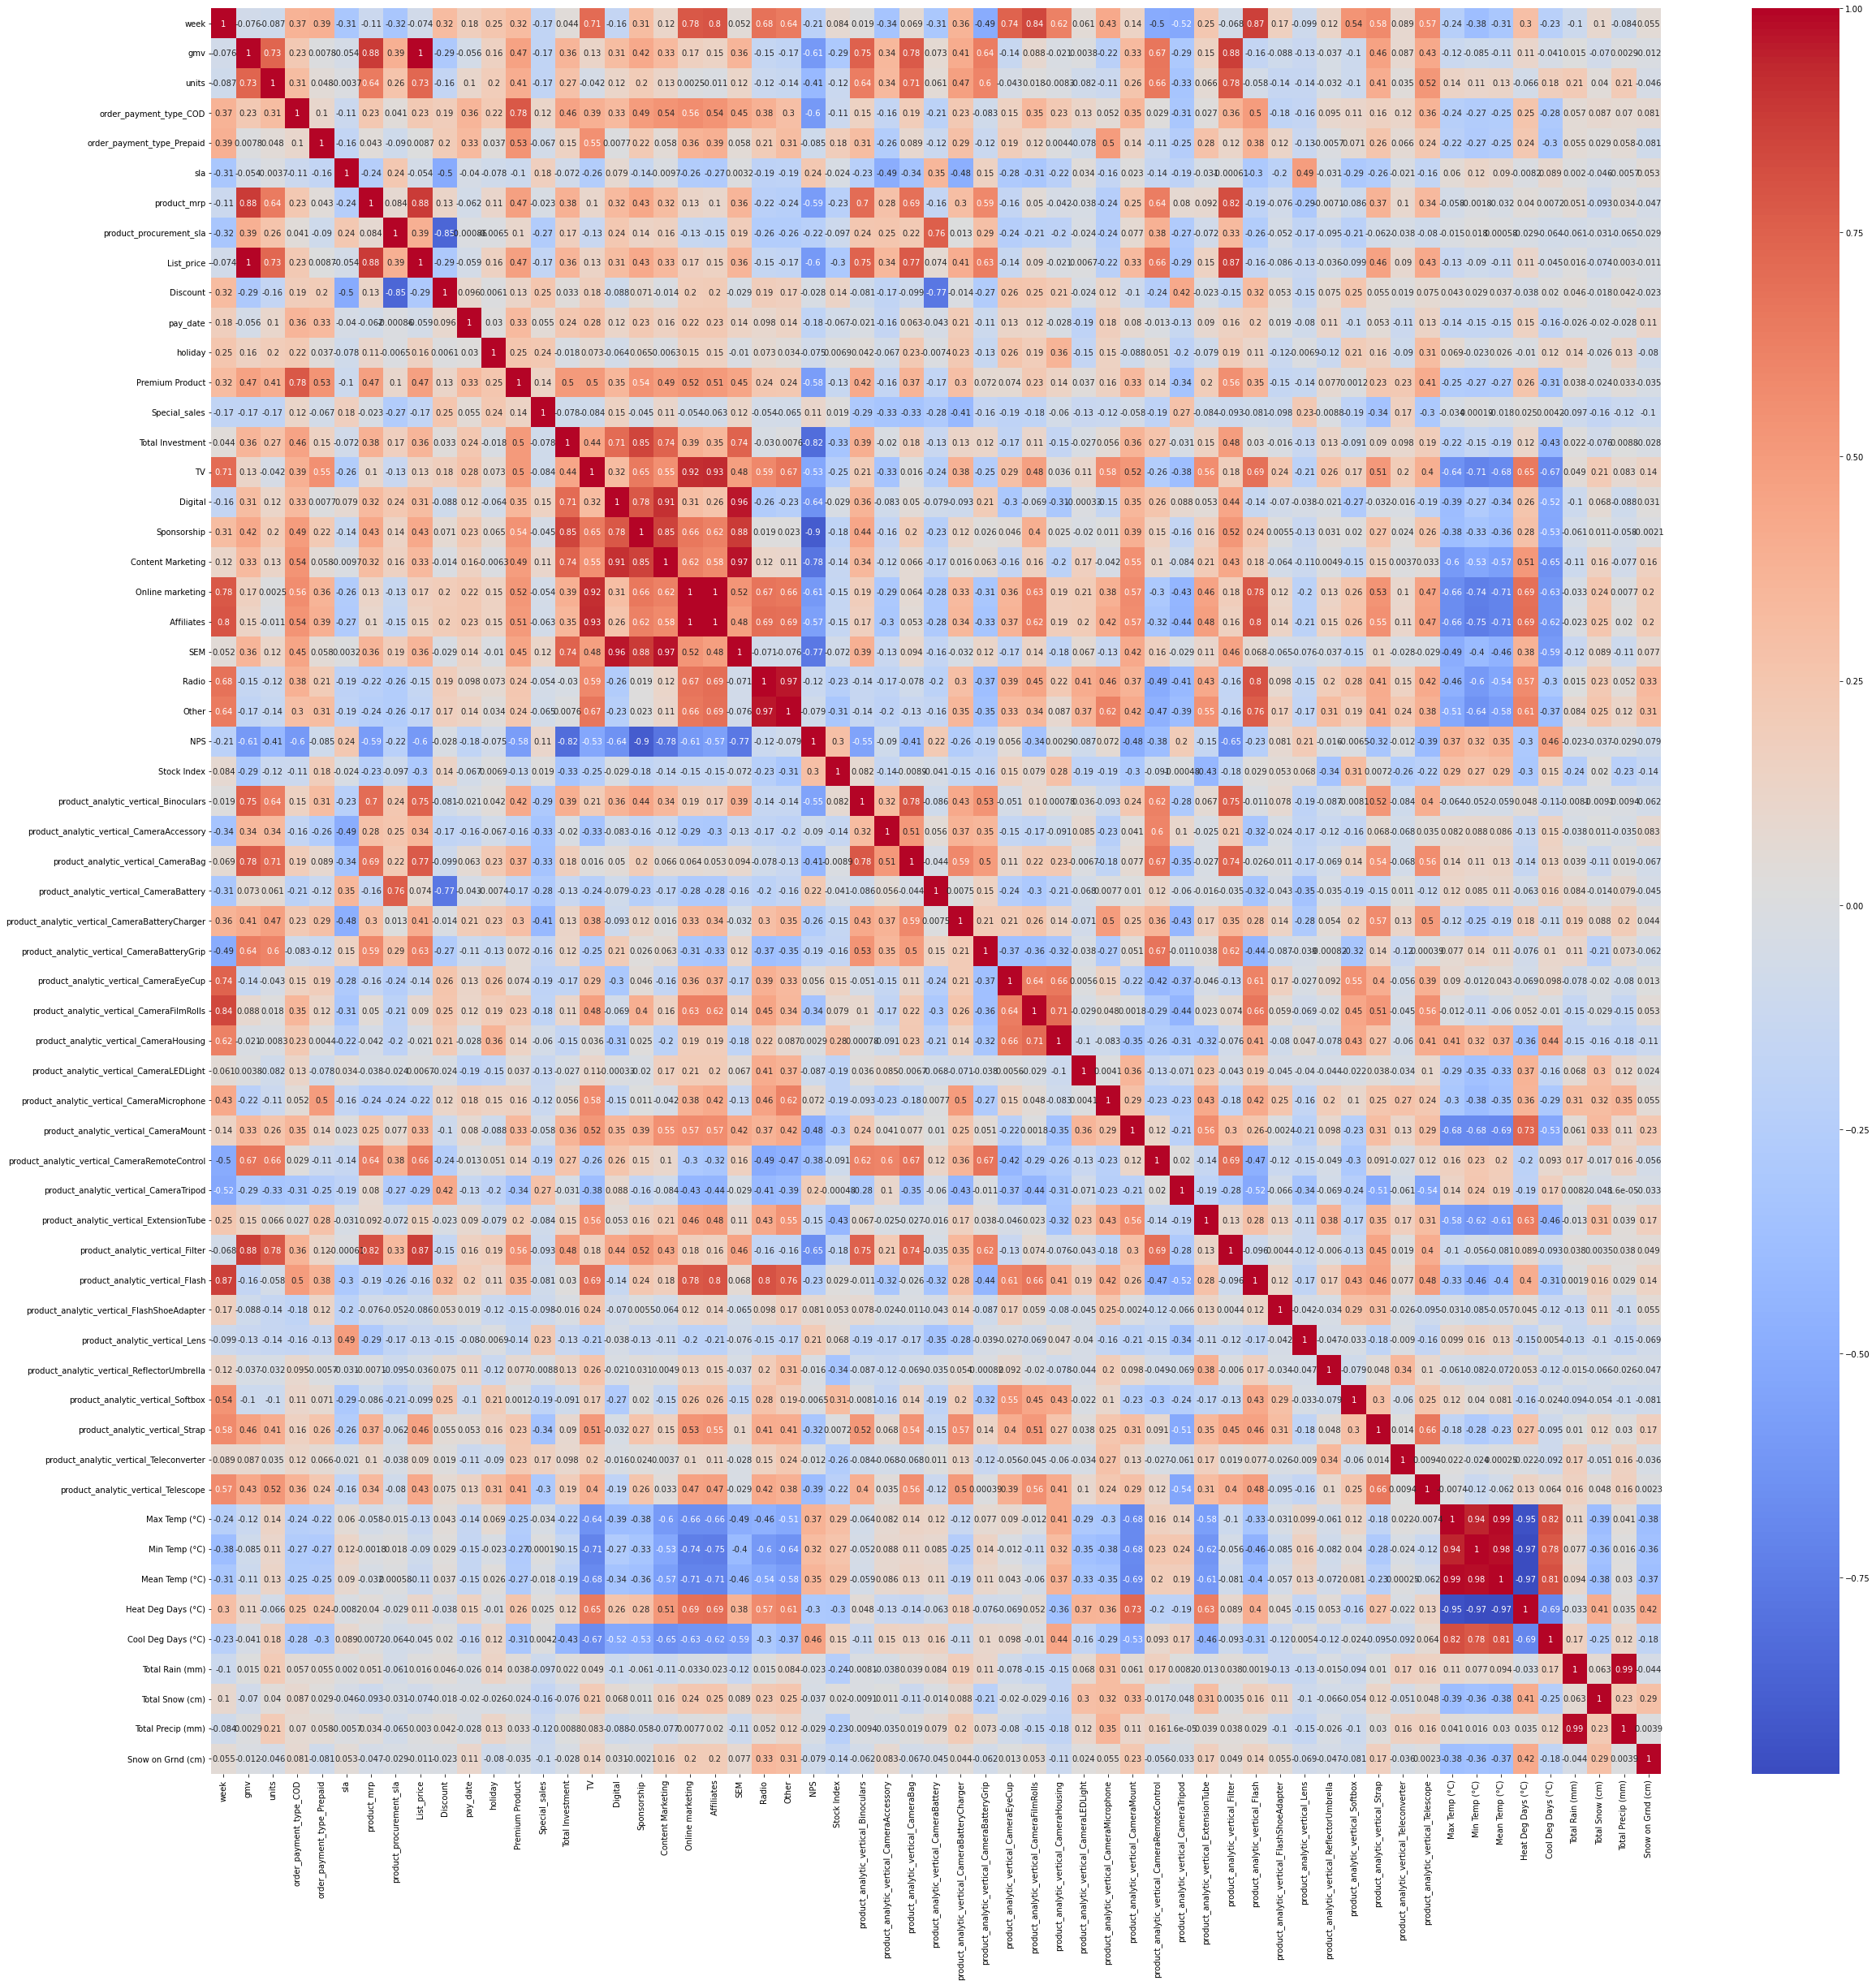

In [77]:
#To remove multicollinearity 
plt.figure(figsize=(40,40))
sns.heatmap(CA_Week.corr(),annot = True, cmap='coolwarm')
plt.show()

In [78]:
CA_Week.drop(['SEM','TV','Digital',' Affiliates','Other','Total Precip (mm)','Heat Deg Days (°C)'],axis=1,inplace=True)

In [79]:
#Creating moving average for NPS, Stock Index

CA_Week[['MA2_NPS','MA2_Stock Index']] = CA_Week[['NPS','Stock Index']].rolling(window=2,min_periods=1).mean()
CA_Week[['MA3_NPS','MA3_Stock Index']] = CA_Week[['NPS','Stock Index']].rolling(window=3,min_periods=1).mean()
CA_Week[['MA4_NPS','MA4_Stock Index']] = CA_Week[['NPS','Stock Index']].rolling(window=4,min_periods=1).mean()

#Reference NPS Inflation 

CA_Week['MA2_NPS'] = (CA_Week['NPS']-CA_Week['MA2_NPS'])/CA_Week['MA2_NPS']
CA_Week['MA3_NPS'] = (CA_Week['NPS']-CA_Week['MA3_NPS'])/CA_Week['MA3_NPS']
CA_Week['MA4_NPS'] = (CA_Week['NPS']-CA_Week['MA4_NPS'])/CA_Week['MA4_NPS']

#Reference Stock Index Inflation 

CA_Week['MA2_Stock Index'] = (CA_Week['Stock Index']-CA_Week['MA2_Stock Index'])/CA_Week['MA2_Stock Index']
CA_Week['MA3_Stock Index'] = (CA_Week['Stock Index']-CA_Week['MA3_Stock Index'])/CA_Week['MA3_Stock Index']
CA_Week['MA4_Stock Index'] = (CA_Week['Stock Index']-CA_Week['MA4_Stock Index'])/CA_Week['MA4_Stock Index']


## -> Gaming Accessory

In [80]:
GA = CE[CE.product_analytic_sub_category == 'GamingAccessory']

In [81]:
#Dropping insignificant columns with single unique values and can't be used for analysis
GA.drop(['product_analytic_category','product_analytic_sub_category'],axis=1,inplace=True)

In [82]:
# Creating dummy variables for categorical variables
dummy= pd.get_dummies(GA[['order_payment_type','product_analytic_vertical']])

# Adding dummy variable to data set
GA= pd.concat([GA, dummy], axis=1)

GA.drop(['order_payment_type','product_analytic_vertical'],axis=1,inplace=True)

In [83]:
#Aggregating data to weekly level

GA_Week = pd.DataFrame(GA.groupby('week').agg({'gmv':'mean', 'units':'mean', 'order_payment_type_COD':'sum','order_payment_type_Prepaid':'sum', 'sla':'mean', 'product_mrp':'mean',
       'product_procurement_sla':'mean', 'List_price':'mean', 'Discount':'mean', 'pay_date':'sum',
       'holiday':'sum', 'Premium Product':'sum', 'Special_sales':'mean',
       'Total Investment':'mean', 'TV':'mean',
       'Digital':'mean', 'Sponsorship':'mean', 'Content Marketing':'mean', 'Online marketing':'mean',
       ' Affiliates':'mean', 'SEM':'mean', 'Radio':'mean', 'Other':'mean', 'NPS':'mean', 'Stock Index':'mean',
       'product_analytic_vertical_CoolingPad':'mean',
       'product_analytic_vertical_GameControlMount':'mean',
       'product_analytic_vertical_GamePad':'mean',
       'product_analytic_vertical_GamingAccessoryKit':'mean',
       'product_analytic_vertical_GamingAdapter':'mean',
       'product_analytic_vertical_GamingChargingStation':'mean',
       'product_analytic_vertical_GamingGun':'mean',
       'product_analytic_vertical_GamingHeadset':'mean',
       'product_analytic_vertical_GamingKeyboard':'mean',
       'product_analytic_vertical_GamingMemoryCard':'mean',
       'product_analytic_vertical_GamingMouse':'mean',
       'product_analytic_vertical_GamingMousePad':'mean',
       'product_analytic_vertical_GamingSpeaker':'mean',
       'product_analytic_vertical_JoystickGamingWheel':'mean',
       'product_analytic_vertical_MotionController':'mean',
       'product_analytic_vertical_TVOutCableAccessory':'mean'}))

In [84]:
GA_Week.reset_index( inplace = True)

In [85]:
GA_Week = GA_Week.merge(climate.groupby('week').sum(),left_on='week',right_on='week',how='outer')

In [86]:
GA_Week.sort_values('week',inplace=True)

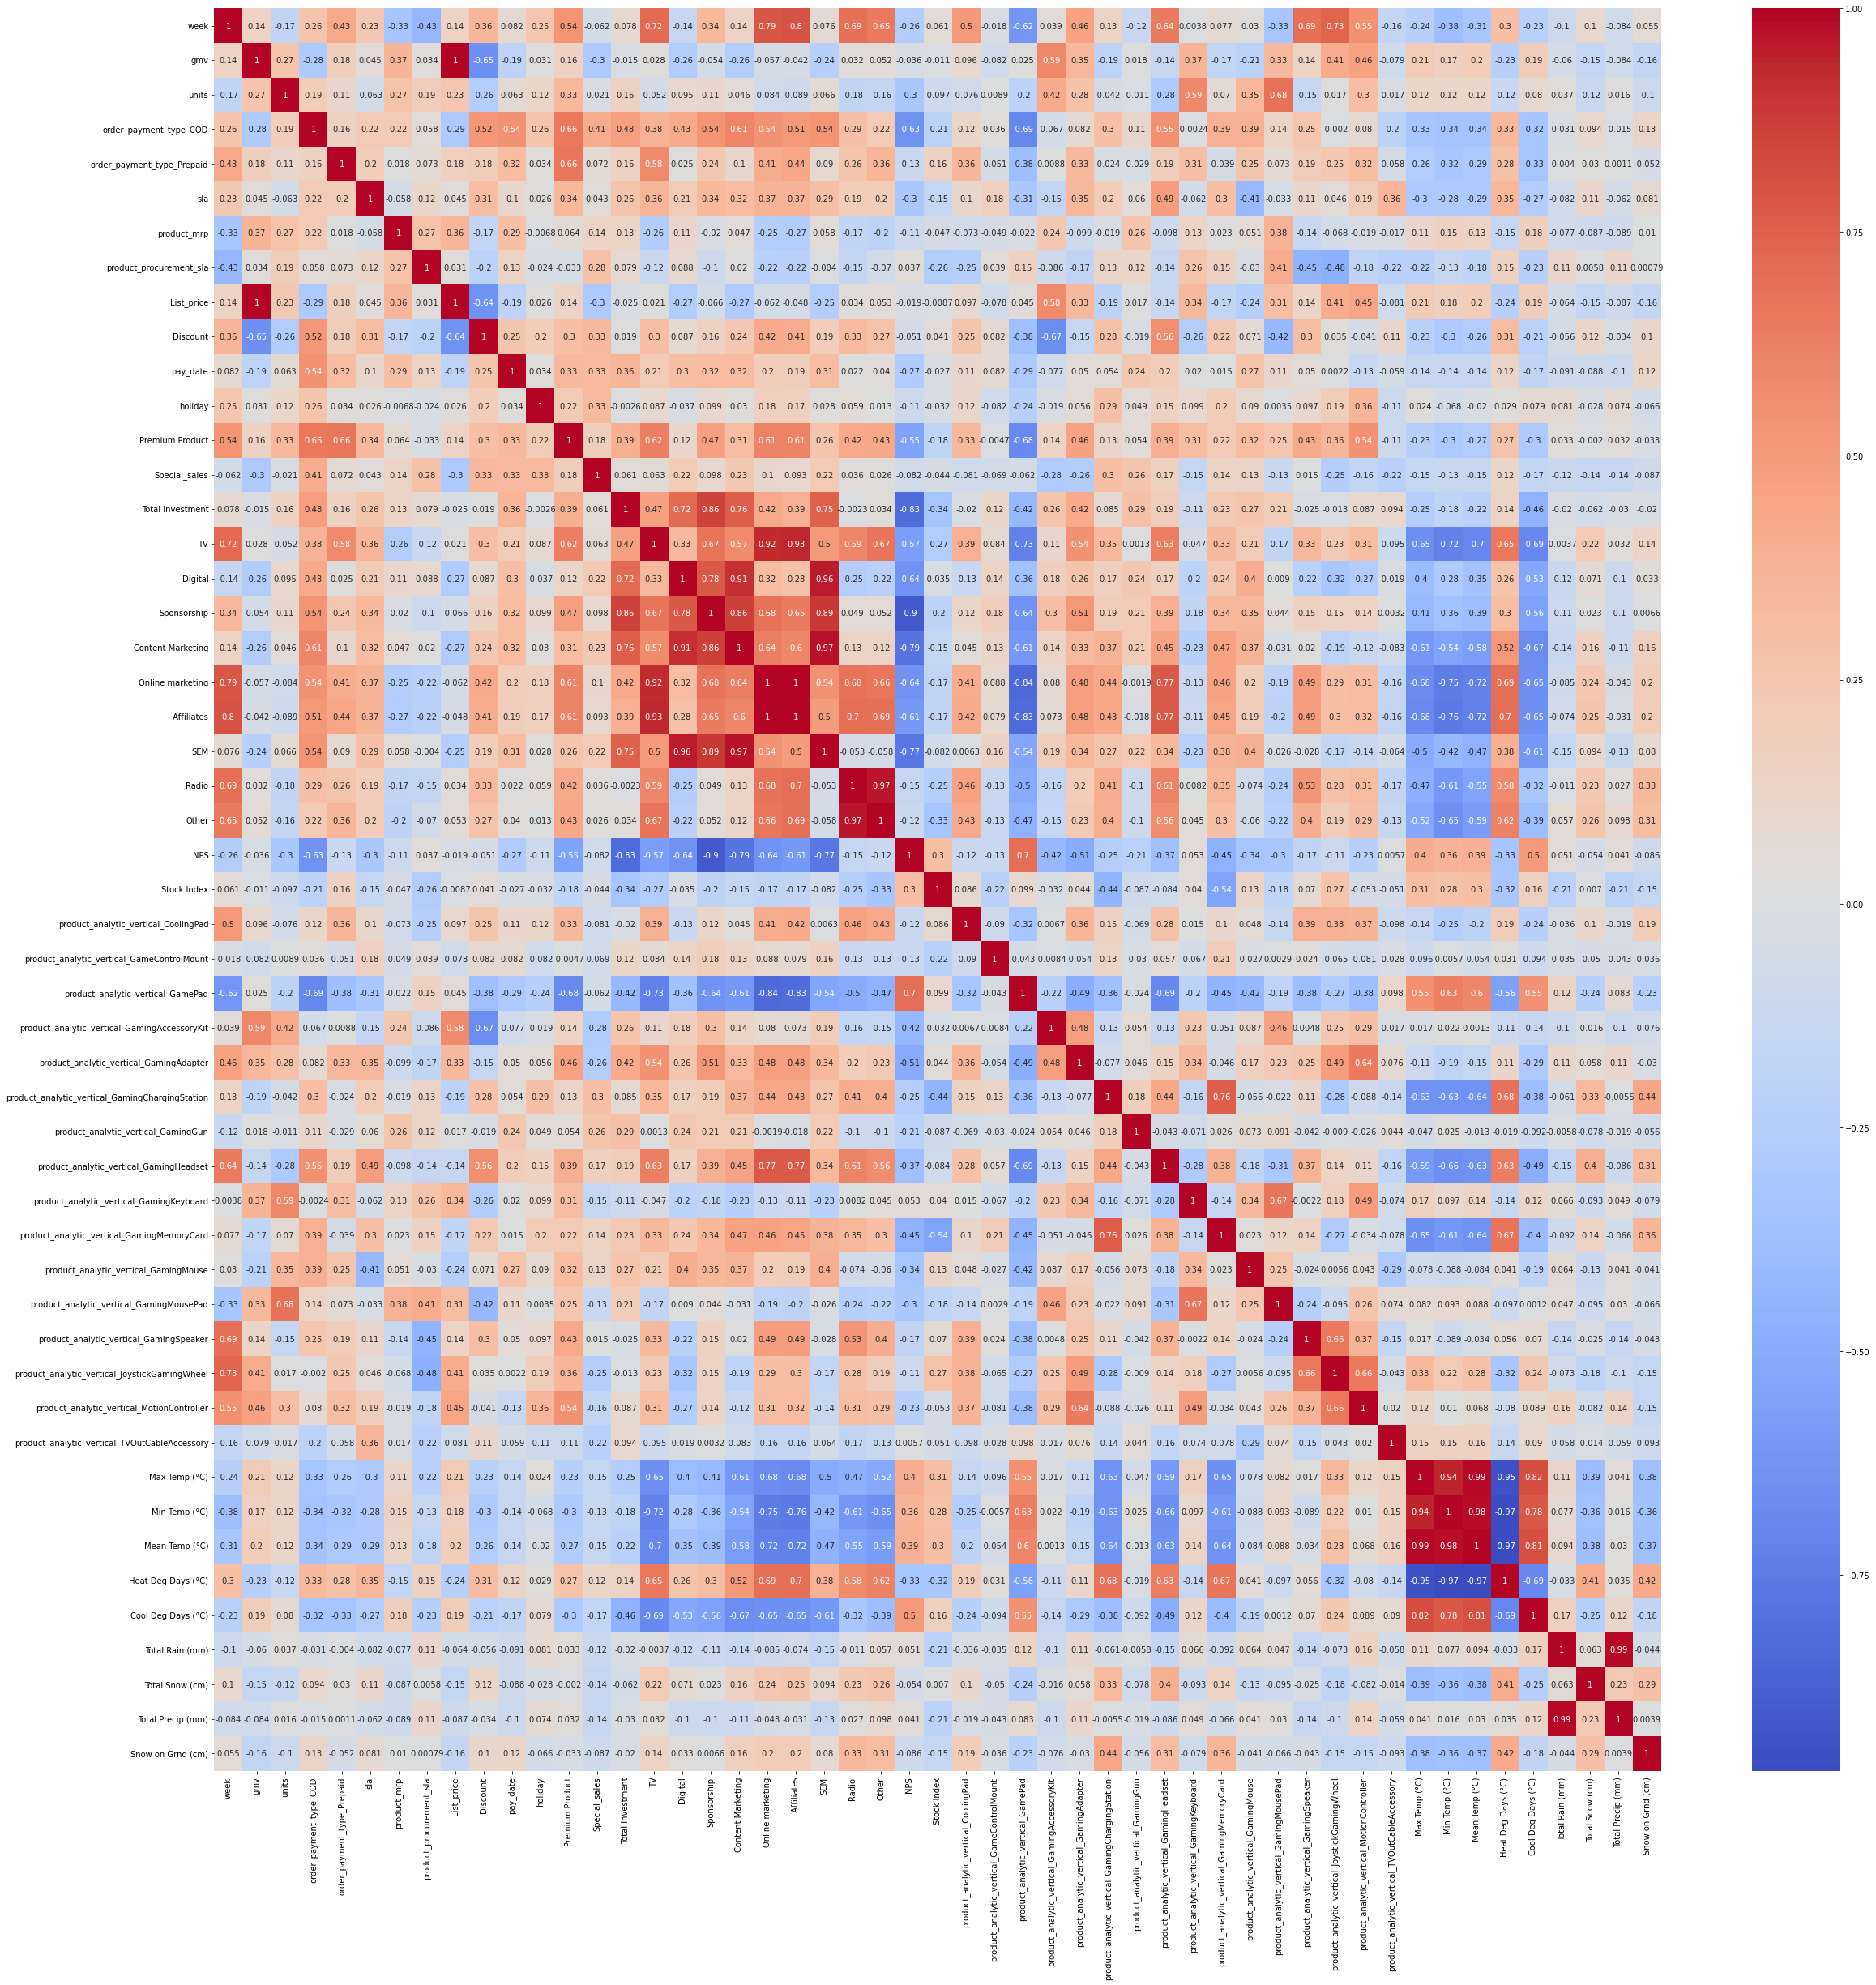

In [87]:
#To remove multicollinearity 
plt.figure(figsize=(40,40))
sns.heatmap(GA_Week.corr(),annot = True, cmap='coolwarm')
plt.show()

In [88]:
GA_Week.drop(['SEM','TV',' Affiliates','Other','Total Precip (mm)','Heat Deg Days (°C)','Max Temp (°C)','Min Temp (°C)','Sponsorship'],axis=1,inplace=True)

In [89]:
#Creating moving average for NPS, Stock Index

GA_Week[['MA2_NPS','MA2_Stock Index']] = GA_Week[['NPS','Stock Index']].rolling(window=2,min_periods=1).mean()
GA_Week[['MA3_NPS','MA3_Stock Index']] = GA_Week[['NPS','Stock Index']].rolling(window=3,min_periods=1).mean()
GA_Week[['MA4_NPS','MA4_Stock Index']] = GA_Week[['NPS','Stock Index']].rolling(window=4,min_periods=1).mean()

#Reference NPS Inflation 

GA_Week['MA2_NPS'] = (GA_Week['NPS']-GA_Week['MA2_NPS'])/GA_Week['MA2_NPS']
GA_Week['MA3_NPS'] = (GA_Week['NPS']-GA_Week['MA3_NPS'])/GA_Week['MA3_NPS']
GA_Week['MA4_NPS'] = (GA_Week['NPS']-GA_Week['MA4_NPS'])/GA_Week['MA4_NPS']

#Reference Stock Index Inflation 

GA_Week['MA2_Stock Index'] = (GA_Week['Stock Index']-GA_Week['MA2_Stock Index'])/GA_Week['MA2_Stock Index']
GA_Week['MA3_Stock Index'] = (GA_Week['Stock Index']-GA_Week['MA3_Stock Index'])/GA_Week['MA3_Stock Index']
GA_Week['MA4_Stock Index'] = (GA_Week['Stock Index']-GA_Week['MA4_Stock Index'])/GA_Week['MA4_Stock Index']


## -> Home Audio

In [90]:
HA = CE[CE.product_analytic_sub_category == 'HomeAudio']

In [91]:
#Dropping insignificant columns with single unique values and can't be used for analysis
HA.drop(['product_analytic_category','product_analytic_sub_category'],axis=1,inplace=True)

In [92]:
# Creating dummy variables for categorical variables
dummy= pd.get_dummies(HA[['order_payment_type','product_analytic_vertical']])

# Adding dummy variable to data set
HA= pd.concat([HA, dummy], axis=1)

HA.drop(['order_payment_type','product_analytic_vertical'],axis=1,inplace=True)

In [93]:
#Aggregating data to weekly level

HA_Week = pd.DataFrame(HA.groupby('week').agg({'gmv':'mean', 'units':'mean', 'order_payment_type_COD':'sum','order_payment_type_Prepaid':'sum', 'sla':'mean', 'product_mrp':'mean',
       'product_procurement_sla':'mean', 'List_price':'mean', 'Discount':'mean', 'pay_date':'sum',
       'holiday':'sum', 'Premium Product':'sum', 'Special_sales':'mean',
       'Total Investment':'mean', 'TV':'mean',
       'Digital':'mean', 'Sponsorship':'mean', 'Content Marketing':'mean', 'Online marketing':'mean',
       ' Affiliates':'mean', 'SEM':'mean', 'Radio':'mean', 'Other':'mean', 'NPS':'mean', 'Stock Index':'mean',
       'product_analytic_vertical_BoomBox':'mean',
       'product_analytic_vertical_DJController':'mean',
       'product_analytic_vertical_Dock':'mean',
       'product_analytic_vertical_DockingStation':'mean',
       'product_analytic_vertical_FMRadio':'mean',
       'product_analytic_vertical_HiFiSystem':'mean',
       'product_analytic_vertical_HomeAudioSpeaker':'mean',
       'product_analytic_vertical_KaraokePlayer':'mean',
       'product_analytic_vertical_SlingBox':'mean',
       'product_analytic_vertical_SoundMixer':'mean',
       'product_analytic_vertical_VoiceRecorder':'mean'}))

In [94]:
HA_Week.reset_index( inplace = True)

In [95]:
HA_Week = HA_Week.merge(climate.groupby('week').sum(),left_on='week',right_on='week',how='outer')

In [96]:
HA_Week.sort_values('week',inplace=True)

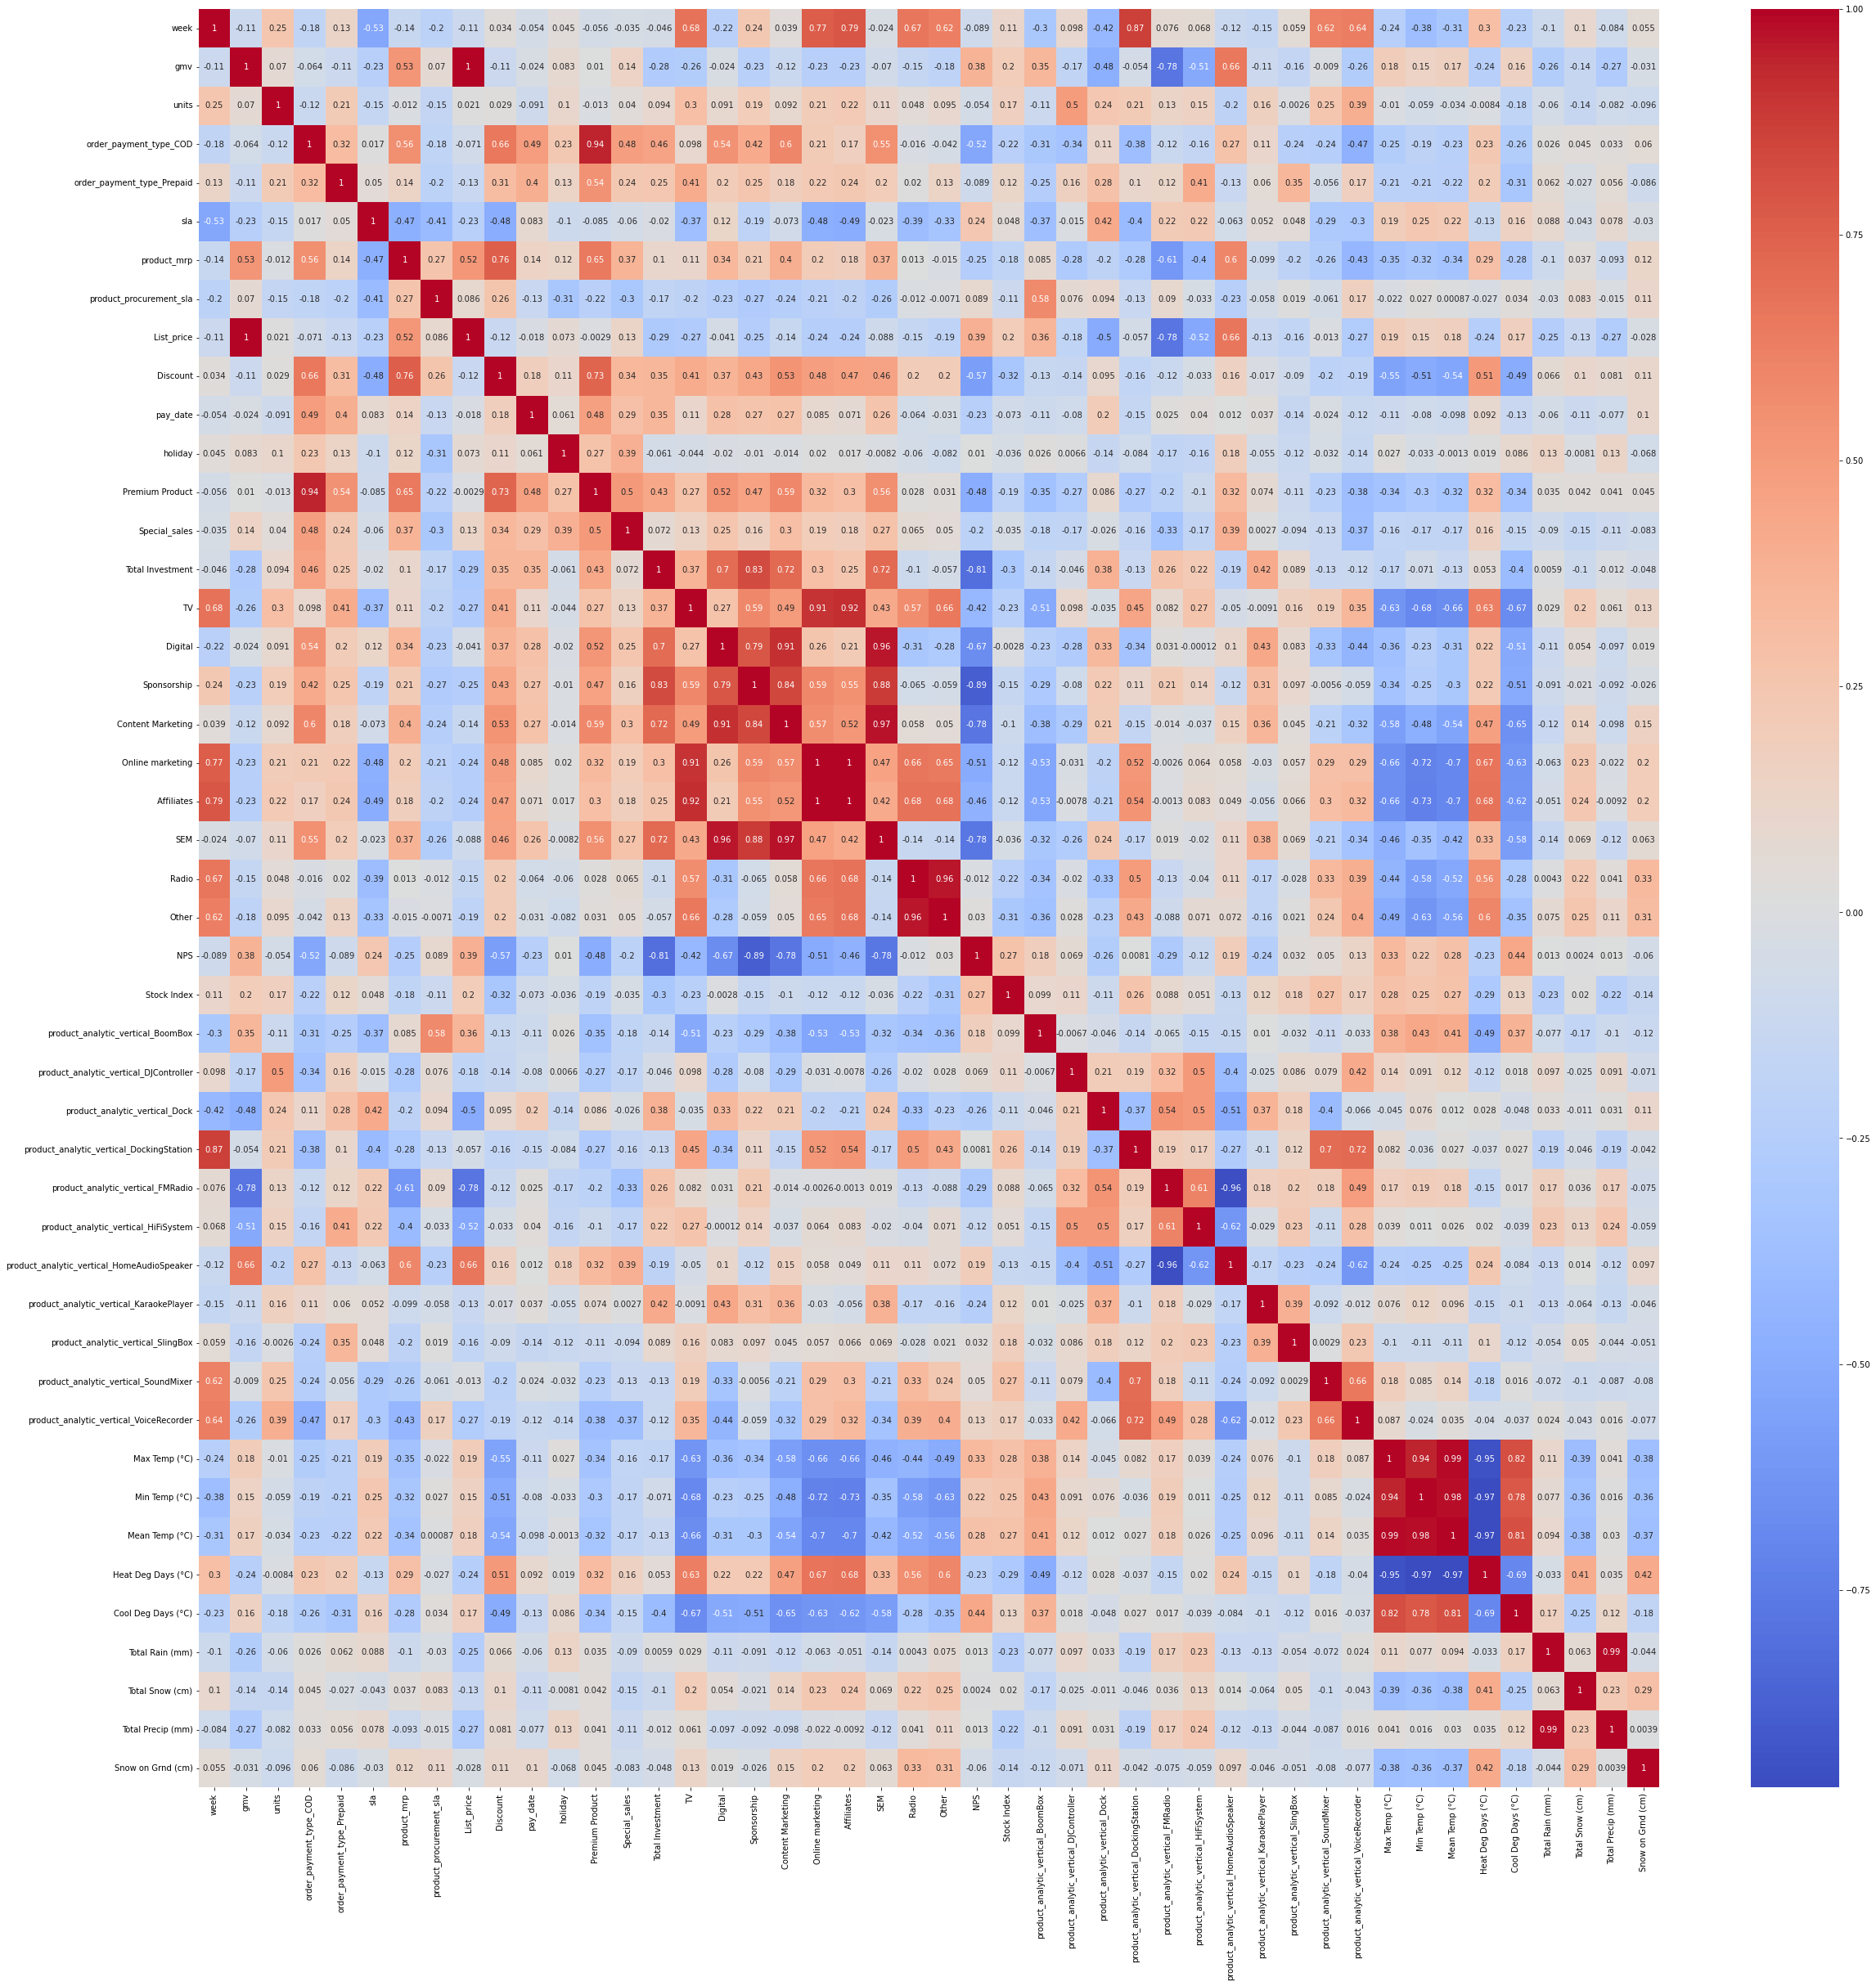

In [97]:
#To remove multicollinearity 
plt.figure(figsize=(40,40))
sns.heatmap(HA_Week.corr(),annot = True, cmap='coolwarm')
plt.show()

In [98]:
HA_Week.drop(['order_payment_type_COD','SEM','TV','Digital',' Affiliates','Other', 'Total Precip (mm)','Heat Deg Days (°C)',
              'Max Temp (°C)','Min Temp (°C)','product_analytic_vertical_FMRadio'],axis=1,inplace=True)

In [99]:
#Creating moving average for NPS, Stock Index

HA_Week[['MA2_NPS','MA2_Stock Index']] = HA_Week[['NPS','Stock Index']].rolling(window=2,min_periods=1).mean()
HA_Week[['MA3_NPS','MA3_Stock Index']] = HA_Week[['NPS','Stock Index']].rolling(window=3,min_periods=1).mean()
HA_Week[['MA4_NPS','MA4_Stock Index']] = HA_Week[['NPS','Stock Index']].rolling(window=4,min_periods=1).mean()

#Reference NPS Inflation 

HA_Week['MA2_NPS'] = (HA_Week['NPS']-HA_Week['MA2_NPS'])/HA_Week['MA2_NPS']
HA_Week['MA3_NPS'] = (HA_Week['NPS']-HA_Week['MA3_NPS'])/HA_Week['MA3_NPS']
HA_Week['MA4_NPS'] = (HA_Week['NPS']-HA_Week['MA4_NPS'])/HA_Week['MA4_NPS']

#Reference Stock Index Inflation 

HA_Week['MA2_Stock Index'] = (HA_Week['Stock Index']-HA_Week['MA2_Stock Index'])/HA_Week['MA2_Stock Index']
HA_Week['MA3_Stock Index'] = (HA_Week['Stock Index']-HA_Week['MA3_Stock Index'])/HA_Week['MA3_Stock Index']
HA_Week['MA4_Stock Index'] = (HA_Week['Stock Index']-HA_Week['MA4_Stock Index'])/HA_Week['MA4_Stock Index']


# -> Model Building-Camera Accessory

In [100]:
CA_Week.fillna(0, inplace = True)
CA_Week.drop('week',axis=1,inplace=True)   

## -> Additive Model

In [101]:
#Creating Additive model dataset
CA_LM = CA_Week[CA_Week.columns]

In [102]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
CA_train, CA_test = train_test_split(CA_LM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

CA_train[CA_train.columns] = scaler.fit_transform(CA_train[CA_train.columns])

CA_test[CA_test.columns] = scaler.fit_transform(CA_test[CA_test.columns])

In [104]:
y_train = CA_train.pop('gmv')
X_train = CA_train

y_test = CA_test.pop('gmv')
X_test = CA_test

In [105]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

CA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = CA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.8816023853294683
Mean Squared Error: 0.008331750607420085


In [106]:
#Building model using K-fold cross validation

y_CA = CA_LM.pop('gmv')
X_CA = CA_LM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

CA_Model_Cross_Validation = LinearRegression().fit(X_CA, y_CA)
CA_Model_Predict_Cross_Validation = cross_val_predict(CA_Model_Cross_Validation, X_CA, y_CA, cv=10)
Accuracy = metrics.r2_score(y_CA, CA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_CA, CA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.9167574297136747
Mean Squared Error: 8402.000628766404


In [107]:
print('Constant:',CA_Model.intercept_)

Constant: 0.06641262487373256


In [108]:
CA_Linear_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(CA_Model.coef_)})
CA_Linear_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
CA_Linear_Model.head(10)

Feature  Coefficients
4                                     product_mrp      0.315653
10                                Premium Product      0.286863
6                                      List_price      0.282759
43                                  Max Temp (°C)      0.171702
37                 product_analytic_vertical_Lens      0.147545
53                                MA3_Stock Index      0.123250
19           product_analytic_vertical_Binoculars      0.121084
31  product_analytic_vertical_CameraRemoteControl      0.107537
15                               Online marketing      0.094160
30          product_analytic_vertical_CameraMount      0.084678

Text(0.5, 0, 'Errors')

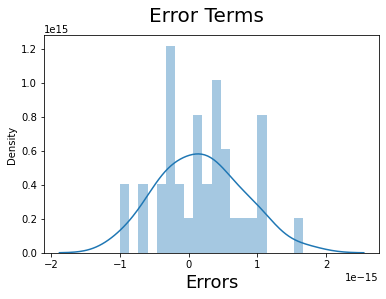

In [109]:
y_train_cnt = CA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

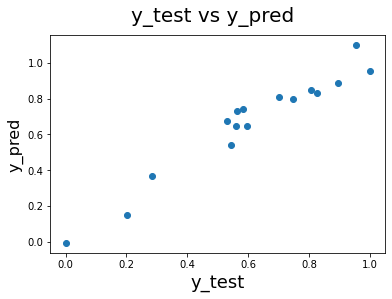

In [110]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Multiplicative Model

In [111]:
#Creating Multiplicative model dataset
CA_MM = CA_Week[CA_Week.columns]

In [112]:
#Taking log
CA_MM = CA_MM.applymap(lambda x: np.log(x))
CA_MM = CA_MM.replace([np.inf, -np.inf], 0)
CA_MM = CA_MM.replace(np.nan, 0)

In [113]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
CA_train, CA_test = train_test_split(CA_MM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

CA_train[CA_train.columns] = scaler.fit_transform(CA_train[CA_train.columns])

CA_test[CA_test.columns] = scaler.fit_transform(CA_test[CA_test.columns])

In [115]:
y_train = CA_train.pop('gmv')
X_train = CA_train

y_test = CA_test.pop('gmv')
X_test = CA_test

In [116]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

CA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = CA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.5885572908450425
Mean Squared Error: 0.025623603309237228


In [117]:
#Building model using K-fold cross validation

y_CA = CA_MM.pop('gmv')
X_CA = CA_MM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

CA_Model_Cross_Validation = LinearRegression().fit(X_CA, y_CA)
CA_Model_Predict_Cross_Validation = cross_val_predict(CA_Model_Cross_Validation, X_CA, y_CA, cv=10)
Accuracy = metrics.r2_score(y_CA, CA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_CA, CA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.8929971611228503
Mean Squared Error: 0.10815666279076865


In [118]:
print('Constant:',CA_Model.intercept_)

Constant: 0.21678951130988267


In [119]:
CA_Multiplicative_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(CA_Model.coef_)})
CA_Multiplicative_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
CA_Multiplicative_Model.head(10)

Feature  Coefficients
6                            List_price      0.205344
3                                   sla      0.121459
4                           product_mrp      0.115112
17                                  NPS      0.104907
5               product_procurement_sla      0.102043
7                              Discount      0.092307
18                          Stock Index      0.089194
15                     Online marketing      0.088941
13                          Sponsorship      0.059356
21  product_analytic_vertical_CameraBag      0.048763

Text(0.5, 0, 'Errors')

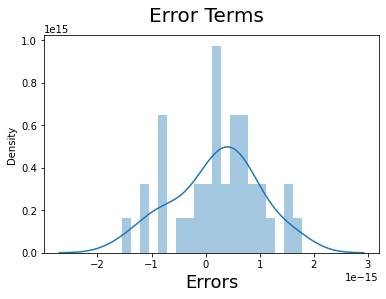

In [120]:
y_train_cnt = CA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

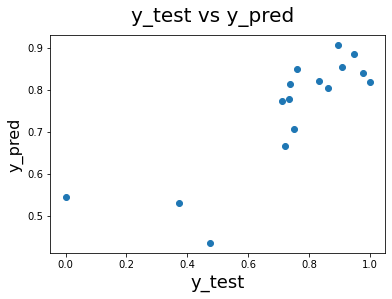

In [121]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Koyck Model

In [122]:
#Creating Kyock model dataset
CA_KM = CA_Week[CA_Week.columns]

In [123]:
#Creating lag variable for GMV
CA_KM['lag_1_gmv'] = CA_KM['gmv'].shift(1).fillna(0)

In [124]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
CA_train, CA_test = train_test_split(CA_KM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

CA_train[CA_train.columns] = scaler.fit_transform(CA_train[CA_train.columns])

CA_test[CA_test.columns] = scaler.fit_transform(CA_test[CA_test.columns])

In [126]:
y_train = CA_train.pop('gmv')
X_train = CA_train

y_test = CA_test.pop('gmv')
X_test = CA_test

In [127]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

CA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = CA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.9199838881584966
Mean Squared Error: 0.005630808444021549


In [128]:
#Building model using K-fold cross validation

y_CA = CA_KM.pop('gmv')
X_CA = CA_KM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

CA_Model_Cross_Validation = LinearRegression().fit(X_CA, y_CA)
CA_Model_Predict_Cross_Validation = cross_val_predict(CA_Model_Cross_Validation, X_CA, y_CA, cv=10)
Accuracy = metrics.r2_score(y_CA, CA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_CA, CA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.9457752115755287
Mean Squared Error: 5473.121563522611


In [129]:
print('Constant:',CA_Model.intercept_)

Constant: -0.0031607169324082696


In [130]:
CA_Koyck_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(CA_Model.coef_)})
CA_Koyck_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
CA_Koyck_Model.head(10)

Feature  Coefficients
6                              List_price      0.390183
10                        Premium Product      0.249848
4                             product_mrp      0.229699
43                          Max Temp (°C)      0.209587
15                       Online marketing      0.153922
5                 product_procurement_sla      0.136100
19   product_analytic_vertical_Binoculars      0.131865
37         product_analytic_vertical_Lens      0.116816
53                        MA3_Stock Index      0.099315
30  product_analytic_vertical_CameraMount      0.082322

In [131]:
#Total effect on KPI from Koyck model

#Coefficient of lag variable
CA_Koyck_Model[CA_Koyck_Model.Feature == 'lag_1_gmv'].Coefficients


56   -0.01886
Name: Coefficients, dtype: float64

In [132]:
CA_Koyck_Model['Total Effect'] = CA_Koyck_Model.Coefficients/(1-(-0.032367))
CA_Koyck_Model.head(10)

Feature  Coefficients  Total Effect
6                              List_price      0.390183      0.377950
10                        Premium Product      0.249848      0.242015
4                             product_mrp      0.229699      0.222498
43                          Max Temp (°C)      0.209587      0.203016
15                       Online marketing      0.153922      0.149096
5                 product_procurement_sla      0.136100      0.131833
19   product_analytic_vertical_Binoculars      0.131865      0.127731
37         product_analytic_vertical_Lens      0.116816      0.113154
53                        MA3_Stock Index      0.099315      0.096201
30  product_analytic_vertical_CameraMount      0.082322      0.079741

Text(0.5, 0, 'Errors')

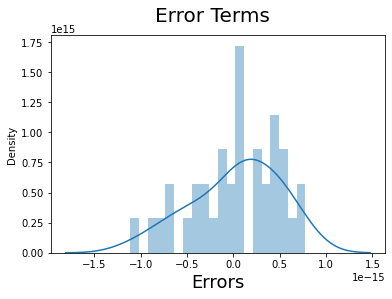

In [133]:
y_train_cnt = CA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

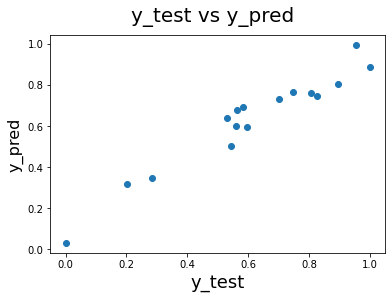

In [134]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Distributive lag model - Additive

In [135]:
#Creating Liner model dataset
CA_DLM_AM = CA_Week[CA_Week.columns]

In [136]:
#Creating lag function for all the variables for 3 weeks

def Lag_Function(Table,columns,n):
    for i in columns:
        Index = Table.columns.get_loc(i) + 1
        Table.insert(loc=Index,column= 'lag_'+np.str(n)+'_'+i,value=Table[i].shift(n))
    return Table

CA_DLM_AM = Lag_Function(CA_DLM_AM,CA_DLM_AM.columns,1)
CA_DLM_AM = Lag_Function(CA_DLM_AM,CA_DLM_AM.columns,2)
CA_DLM_AM = Lag_Function(CA_DLM_AM,CA_DLM_AM.columns,3)
CA_DLM_AM.fillna(0, inplace = True)

In [137]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
CA_train, CA_test = train_test_split(CA_DLM_AM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

CA_train[CA_train.columns] = scaler.fit_transform(CA_train[CA_train.columns])

CA_test[CA_test.columns] = scaler.fit_transform(CA_test[CA_test.columns])

In [139]:
y_train = CA_train.pop('gmv')
X_train = CA_train

y_test = CA_test.pop('gmv')
X_test = CA_test

In [140]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

CA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = CA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.5385033819714378
Mean Squared Error: 0.03247594757953179


In [141]:
#Building model using K-fold cross validation

y_CA = CA_DLM_AM.pop('gmv')
X_CA = CA_DLM_AM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

CA_Model_Cross_Validation = LinearRegression().fit(X_CA, y_CA)
CA_Model_Predict_Cross_Validation = cross_val_predict(CA_Model_Cross_Validation, X_CA, y_CA, cv=10)
Accuracy = metrics.r2_score(y_CA, CA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_CA, CA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.7302469435363838
Mean Squared Error: 27227.23892622629


In [142]:
print('Constant:',CA_Model.intercept_)

Constant: 0.5403147460524116


In [143]:
CA_Distributive_Lag_Model_Additive = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(CA_Model.coef_)})
CA_Distributive_Lag_Model_Additive.sort_values(by='Coefficients',ascending=False,inplace=True)
CA_Distributive_Lag_Model_Additive.head(10)

Feature  Coefficients
55                                      List_price      0.038474
39                                     product_mrp      0.033514
183        product_analytic_vertical_CameraBattery      0.033325
175            product_analytic_vertical_CameraBag      0.030507
279               product_analytic_vertical_Filter      0.029729
159           product_analytic_vertical_Binoculars      0.027835
255  product_analytic_vertical_CameraRemoteControl      0.027490
199    product_analytic_vertical_CameraBatteryGrip      0.025485
167      product_analytic_vertical_CameraAccessory      0.024227
47                         product_procurement_sla      0.023184

Text(0.5, 0, 'Errors')

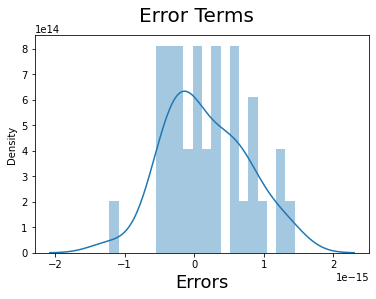

In [144]:
y_train_cnt = CA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

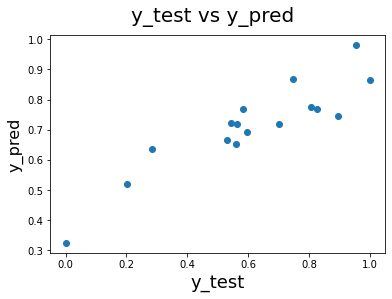

In [145]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Distributive lag model - Multiplicative

In [146]:
#Creating Liner model dataset
CA_DLM_MM = CA_Week[CA_Week.columns]

In [147]:
#Creating lag function for all the variables for 3 weeks

def Lag_Function(Table,columns,n):
    for i in columns:
        Index = Table.columns.get_loc(i) + 1
        Table.insert(loc=Index,column= 'lag_'+np.str(n)+'_'+i,value=Table[i].shift(n))
    return Table

CA_DLM_MM = Lag_Function(CA_DLM_MM,CA_DLM_MM.columns,1)
CA_DLM_MM = Lag_Function(CA_DLM_MM,CA_DLM_MM.columns,2)
CA_DLM_MM = Lag_Function(CA_DLM_MM,CA_DLM_MM.columns,3)
CA_DLM_MM.fillna(0, inplace = True)

In [148]:
#Taking log
CA_DLM_MM = CA_DLM_MM.applymap(lambda x: np.log(x))
CA_DLM_MM = CA_DLM_MM.replace([np.inf, -np.inf], 0)
CA_DLM_MM = CA_DLM_MM.replace(np.nan, 0)

In [149]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
CA_train, CA_test = train_test_split(CA_DLM_MM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

CA_train[CA_train.columns] = scaler.fit_transform(CA_train[CA_train.columns])

CA_test[CA_test.columns] = scaler.fit_transform(CA_test[CA_test.columns])

In [151]:
y_train = CA_train.pop('gmv')
X_train = CA_train

y_test = CA_test.pop('gmv')
X_test = CA_test

In [152]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

CA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = CA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.23817169986029785
Mean Squared Error: 0.04744472491108921


In [153]:
#Building model using K-fold cross validation

y_CA = CA_DLM_MM.pop('gmv')
X_CA = CA_DLM_MM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

CA_Model_Cross_Validation = LinearRegression().fit(X_CA, y_CA)
CA_Model_Predict_Cross_Validation = cross_val_predict(CA_Model_Cross_Validation, X_CA, y_CA, cv=10)
Accuracy = metrics.r2_score(y_CA, CA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_CA, CA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: -0.12861595111236812
Mean Squared Error: 1.1407859466690315


In [154]:
print('Constant:',CA_Model.intercept_)

Constant: 0.6859739886481138


In [155]:
CA_Distributive_Lag_Model_Multiplicative = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(CA_Model.coef_)})
CA_Distributive_Lag_Model_Multiplicative.sort_values(by='Coefficients',ascending=False,inplace=True)
CA_Distributive_Lag_Model_Multiplicative.head(10)

Feature  Coefficients
151                Stock Index      0.025219
143                        NPS      0.024530
55                  List_price      0.023854
39                 product_mrp      0.023545
31                         sla      0.023263
98   lag_3_lag_2_Special_sales      0.022863
63                    Discount      0.022746
47     product_procurement_sla      0.019988
84         lag_3_lag_1_holiday      0.015999
111                Sponsorship      0.015688

Text(0.5, 0, 'Errors')

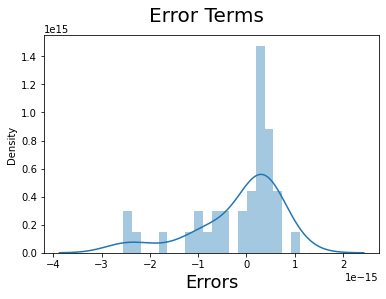

In [156]:
y_train_cnt = CA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

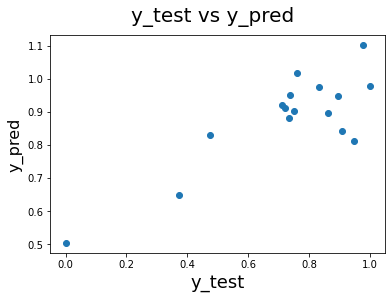

In [157]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# -> Model Building-Gaming Accessory

In [158]:
GA_Week.fillna(0, inplace = True)
GA_Week.drop('week',axis=1,inplace=True)   

## -> Aditive Model

In [159]:
#Creating Additive model dataset
GA_LM = GA_Week[GA_Week.columns]

In [160]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
GA_train, GA_test = train_test_split(GA_LM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

GA_train[GA_train.columns] = scaler.fit_transform(GA_train[GA_train.columns])

GA_test[GA_test.columns] = scaler.fit_transform(GA_test[GA_test.columns])

In [162]:
y_train = GA_train.pop('gmv')
X_train = GA_train

y_test = GA_test.pop('gmv')
X_test = GA_test

In [163]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

GA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = GA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.9395232266589164
Mean Squared Error: 0.004092360889155142


In [164]:
#Building model using K-fold cross validation

y_GA = GA_LM.pop('gmv')
X_GA = GA_LM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

GA_Model_Cross_Validation = LinearRegression().fit(X_GA, y_GA)
GA_Model_Predict_Cross_Validation = cross_val_predict(GA_Model_Cross_Validation, X_GA, y_GA, cv=10)
Accuracy = metrics.r2_score(y_GA, GA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_GA, GA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.5545956508954234
Mean Squared Error: 11365.239171680782


In [165]:
print('Constant:',GA_Model.intercept_)

Constant: 0.13974327297428235


In [166]:
GA_Linear_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(GA_Model.coef_)})
GA_Linear_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
GA_Linear_Model.head(10)

Feature  Coefficients
6                                        List_price      0.712359
4                                       product_mrp      0.216199
27         product_analytic_vertical_GamingKeyboard      0.168923
15                                 Online marketing      0.149934
10                                  Premium Product      0.082117
12                                 Total Investment      0.077038
24  product_analytic_vertical_GamingChargingStation      0.062937
0                                             units      0.051388
42                                          MA3_NPS      0.045267
20       product_analytic_vertical_GameControlMount      0.043506

Text(0.5, 0, 'Errors')

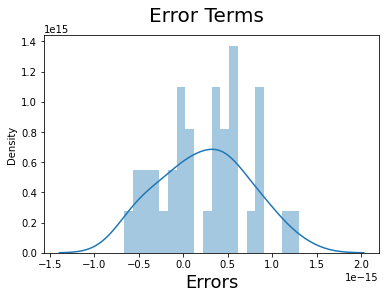

In [167]:
y_train_cnt = GA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

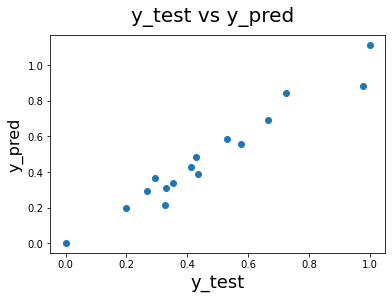

In [168]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Multiplicative Model

In [169]:
#Creating Multiplicative model dataset
GA_MM = GA_Week[GA_Week.columns]

In [170]:
#Taking log
GA_MM = GA_MM.applymap(lambda x: np.log(x))
GA_MM = GA_MM.replace([np.inf, -np.inf], 0)
GA_MM = GA_MM.replace(np.nan, 0)

In [171]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
GA_train, GA_test = train_test_split(GA_MM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

GA_train[GA_train.columns] = scaler.fit_transform(GA_train[GA_train.columns])

GA_test[GA_test.columns] = scaler.fit_transform(GA_test[GA_test.columns])

In [173]:
y_train = GA_train.pop('gmv')
X_train = GA_train

y_test = GA_test.pop('gmv')
X_test = GA_test

In [174]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

GA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = GA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.8144150437147077
Mean Squared Error: 0.01151325337061786


In [175]:
#Building model using K-fold cross validation

y_GA = GA_MM.pop('gmv')
X_GA = GA_MM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

GA_Model_Cross_Validation = LinearRegression().fit(X_GA, y_GA)
GA_Model_Predict_Cross_Validation = cross_val_predict(GA_Model_Cross_Validation, X_GA, y_GA, cv=10)
Accuracy = metrics.r2_score(y_GA, GA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_GA, GA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: -0.35013967265416834
Mean Squared Error: 0.06477419803164058


In [176]:
print('Constant:',GA_Model.intercept_)

Constant: 0.6191758466965349


In [177]:
GA_Multiplicative_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(GA_Model.coef_)})
GA_Multiplicative_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
GA_Multiplicative_Model.head(10)

Feature  Coefficients
6                                      List_price      0.550346
33     product_analytic_vertical_MotionController      0.142607
10                                Premium Product      0.126049
32  product_analytic_vertical_JoystickGamingWheel      0.087956
15                               Online marketing      0.061693
3                                             sla      0.059104
5                         product_procurement_sla      0.053134
40                                        MA2_NPS      0.049134
35                                 Mean Temp (°C)      0.041807
4                                     product_mrp      0.036079

Text(0.5, 0, 'Errors')

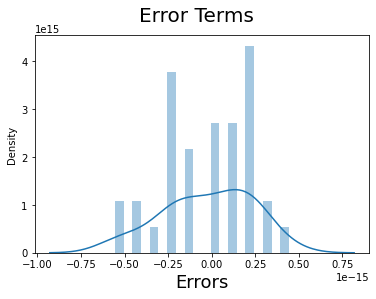

In [178]:
y_train_cnt = GA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

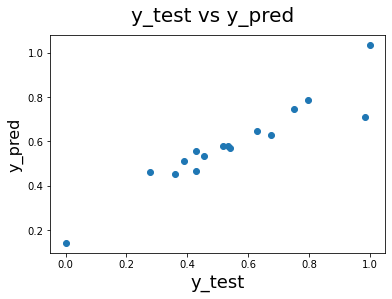

In [179]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Koyck Model

In [180]:
#Creating Kyock model dataset
GA_KM = GA_Week[GA_Week.columns]

In [181]:
#Creating lag variable for GMV
GA_KM['lag_1_gmv'] = GA_KM['gmv'].shift(1).fillna(0)

In [182]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
GA_train, GA_test = train_test_split(GA_KM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

GA_train[GA_train.columns] = scaler.fit_transform(GA_train[GA_train.columns])

GA_test[GA_test.columns] = scaler.fit_transform(GA_test[GA_test.columns])

In [184]:
y_train = GA_train.pop('gmv')
X_train = GA_train

y_test = GA_test.pop('gmv')
X_test = GA_test

In [185]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

GA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = GA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.7455094297032897
Mean Squared Error: 0.017220946141872733


In [186]:
#Building model using K-fold cross validation

y_GA = GA_KM.pop('gmv')
X_GA = GA_KM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

GA_Model_Cross_Validation = LinearRegression().fit(X_GA, y_GA)
GA_Model_Predict_Cross_Validation = cross_val_predict(GA_Model_Cross_Validation, X_GA, y_GA, cv=10)
Accuracy = metrics.r2_score(y_GA, GA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_GA, GA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: -0.8854600239172934
Mean Squared Error: 48110.67553233917


In [187]:
print('Constant:',GA_Model.intercept_)

Constant: 0.16695142504141136


In [188]:
GA_Koyck_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(GA_Model.coef_)})
GA_Koyck_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
GA_Koyck_Model.head(10)

Feature  Coefficients
6                                        List_price      0.772373
26          product_analytic_vertical_GamingHeadset      0.289644
21                product_analytic_vertical_GamePad      0.286672
4                                       product_mrp      0.240098
44                                          MA4_NPS      0.189205
1                            order_payment_type_COD      0.132790
33       product_analytic_vertical_MotionController      0.116589
0                                             units      0.109566
24  product_analytic_vertical_GamingChargingStation      0.107373
32    product_analytic_vertical_JoystickGamingWheel      0.106992

In [189]:
#Total effect on KPI from Koyck model

#Coefficient of lag variable
GA_Koyck_Model[GA_Koyck_Model.Feature == 'lag_1_gmv'].Coefficients


46    0.013429
Name: Coefficients, dtype: float64

In [190]:
GA_Koyck_Model['Total Effect'] = GA_Koyck_Model.Coefficients/(1-(-0.032367))
GA_Koyck_Model.head(10)

Feature  Coefficients  \
6                                        List_price      0.772373   
26          product_analytic_vertical_GamingHeadset      0.289644   
21                product_analytic_vertical_GamePad      0.286672   
4                                       product_mrp      0.240098   
44                                          MA4_NPS      0.189205   
1                            order_payment_type_COD      0.132790   
33       product_analytic_vertical_MotionController      0.116589   
0                                             units      0.109566   
24  product_analytic_vertical_GamingChargingStation      0.107373   
32    product_analytic_vertical_JoystickGamingWheel      0.106992   

    Total Effect  
6       0.748157  
26      0.280563  
21      0.277684  
4       0.232570  
44      0.183273  
1       0.128626  
33      0.112934  
0       0.106131  
24      0.104006  
32      0.103637

Text(0.5, 0, 'Errors')

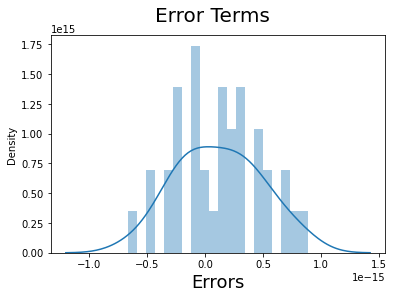

In [191]:
y_train_cnt = GA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

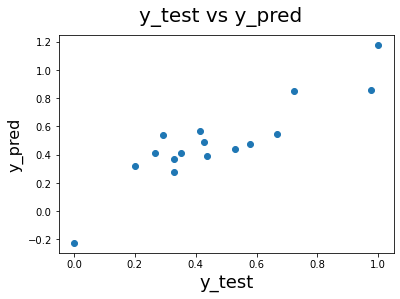

In [192]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Distributive lag model - Additive

In [193]:
#Creating Liner model dataset
GA_DLM_AM = GA_Week[GA_Week.columns]

In [194]:
#Creating lag function for all the variables for 3 weeks

def Lag_Function(Table,columns,n):
    for i in columns:
        Index = Table.columns.get_loc(i) + 1
        Table.insert(loc=Index,column= 'lag_'+np.str(n)+'_'+i,value=Table[i].shift(n))
    return Table

GA_DLM_AM = Lag_Function(GA_DLM_AM,GA_DLM_AM.columns,1)
GA_DLM_AM = Lag_Function(GA_DLM_AM,GA_DLM_AM.columns,2)
GA_DLM_AM = Lag_Function(GA_DLM_AM,GA_DLM_AM.columns,3)
GA_DLM_AM.fillna(0, inplace = True)

In [195]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
GA_train, GA_test = train_test_split(GA_DLM_AM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [196]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

GA_train[GA_train.columns] = scaler.fit_transform(GA_train[GA_train.columns])

GA_test[GA_test.columns] = scaler.fit_transform(GA_test[GA_test.columns])

In [197]:
y_train = GA_train.pop('gmv')
X_train = GA_train

y_test = GA_test.pop('gmv')
X_test = GA_test

In [198]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

GA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = GA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: -0.6145133274058792
Mean Squared Error: 0.10925138414431769


In [199]:
#Building model using K-fold cross validation

y_GA = GA_DLM_AM.pop('gmv')
X_GA = GA_DLM_AM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

GA_Model_Cross_Validation = LinearRegression().fit(X_GA, y_GA)
GA_Model_Predict_Cross_Validation = cross_val_predict(GA_Model_Cross_Validation, X_GA, y_GA, cv=10)
Accuracy = metrics.r2_score(y_GA, GA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_GA, GA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: -0.3903594045877843
Mean Squared Error: 35477.35265608229


In [200]:
print('Constant:',GA_Model.intercept_)

Constant: 0.709832288851512


In [201]:
GA_Distributive_Lag_Model_Additive = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(GA_Model.coef_)})
GA_Distributive_Lag_Model_Additive.sort_values(by='Coefficients',ascending=False,inplace=True)
GA_Distributive_Lag_Model_Additive.head(10)

Feature  Coefficients
55                                         List_price      0.060318
191           product_analytic_vertical_GamingAdapter      0.045695
271        product_analytic_vertical_MotionController      0.041585
279     product_analytic_vertical_TVOutCableAccessory      0.036360
183      product_analytic_vertical_GamingAccessoryKit      0.035661
31                                                sla      0.033393
263     product_analytic_vertical_JoystickGamingWheel      0.030257
247          product_analytic_vertical_GamingMousePad      0.030188
193     lag_2_product_analytic_vertical_GamingAdapter      0.029801
273  lag_2_product_analytic_vertical_MotionController      0.025585

Text(0.5, 0, 'Errors')

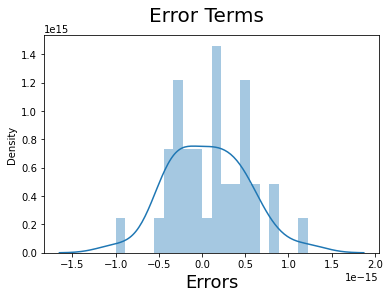

In [202]:
y_train_cnt = GA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

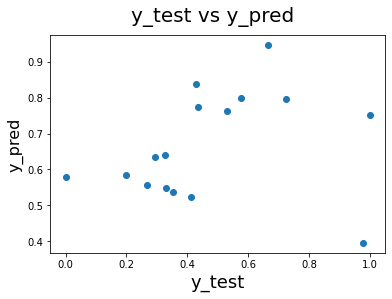

In [203]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Distributive lag model - Multiplicative

In [204]:
#Creating Liner model dataset
GA_DLM_MM = GA_Week[GA_Week.columns]

In [205]:
#Creating lag function for all the variables for 3 weeks

def Lag_Function(Table,columns,n):
    for i in columns:
        Index = Table.columns.get_loc(i) + 1
        Table.insert(loc=Index,column= 'lag_'+np.str(n)+'_'+i,value=Table[i].shift(n))
    return Table

GA_DLM_MM = Lag_Function(GA_DLM_MM,GA_DLM_MM.columns,1)
GA_DLM_MM = Lag_Function(GA_DLM_MM,GA_DLM_MM.columns,2)
GA_DLM_MM = Lag_Function(GA_DLM_MM,GA_DLM_MM.columns,3)
GA_DLM_MM.fillna(0, inplace = True)

In [206]:
#Taking log
GA_DLM_MM = GA_DLM_MM.applymap(lambda x: np.log(x))
GA_DLM_MM = GA_DLM_MM.replace([np.inf, -np.inf], 0)
GA_DLM_MM = GA_DLM_MM.replace(np.nan, 0)

In [207]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
GA_train, GA_test = train_test_split(GA_DLM_MM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

GA_train[GA_train.columns] = scaler.fit_transform(GA_train[GA_train.columns])

GA_test[GA_test.columns] = scaler.fit_transform(GA_test[GA_test.columns])

In [209]:
y_train = GA_train.pop('gmv')
X_train = GA_train

y_test = GA_test.pop('gmv')
X_test = GA_test

In [210]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

GA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = GA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: -0.6903660887101224
Mean Squared Error: 0.10486632892001435


In [211]:
#Building model using K-fold cross validation

y_GA = GA_DLM_MM.pop('gmv')
X_GA = GA_DLM_MM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

GA_Model_Cross_Validation = LinearRegression().fit(X_GA, y_GA)
GA_Model_Predict_Cross_Validation = cross_val_predict(GA_Model_Cross_Validation, X_GA, y_GA, cv=10)
Accuracy = metrics.r2_score(y_GA, GA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_GA, GA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: -0.7925135446038243
Mean Squared Error: 0.08599749319588121


In [212]:
print('Constant:',GA_Model.intercept_)

Constant: 0.3313454615299425


In [213]:
GA_Distributive_Lag_Model_Multiplicative = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(GA_Model.coef_)})
GA_Distributive_Lag_Model_Multiplicative.sort_values(by='Coefficients',ascending=False,inplace=True)
GA_Distributive_Lag_Model_Multiplicative.head(10)

Feature  Coefficients
55                                          List_price      0.035355
98                           lag_3_lag_2_Special_sales      0.028045
261  lag_2_lag_1_product_analytic_vertical_GamingSp...      0.022543
256      lag_3_product_analytic_vertical_GamingSpeaker      0.022543
84                                 lag_3_lag_1_holiday      0.022529
222  lag_3_lag_2_lag_1_product_analytic_vertical_Ga...      0.021656
31                                                 sla      0.021419
23                          order_payment_type_Prepaid      0.020456
87                                     Premium Product      0.020323
336                              lag_3_MA2_Stock Index      0.019791

Text(0.5, 0, 'Errors')

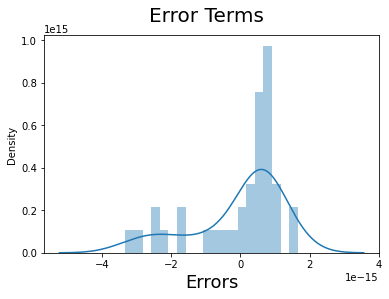

In [214]:
y_train_cnt = GA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

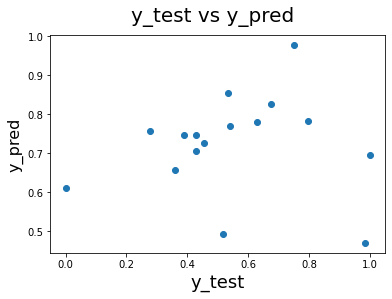

In [215]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# -> Model Building-Home Audio

In [216]:
HA_Week.fillna(0, inplace = True)
HA_Week.drop('week',axis=1,inplace=True)   

## -> Additive Model

In [217]:
#Creating Additive model dataset
HA_LM = HA_Week[HA_Week.columns]

In [218]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
HA_train, HA_test = train_test_split(HA_LM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

HA_train[HA_train.columns] = scaler.fit_transform(HA_train[HA_train.columns])

HA_test[HA_test.columns] = scaler.fit_transform(HA_test[HA_test.columns])

In [220]:
y_train = HA_train.pop('gmv')
X_train = HA_train

y_test = HA_test.pop('gmv')
X_test = HA_test

In [221]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

HA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = HA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.9364409951754055
Mean Squared Error: 0.0026790497130408097


In [222]:
#Building model using K-fold cross validation

y_HA = HA_LM.pop('gmv')
X_HA = HA_LM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

HA_Model_Cross_Validation = LinearRegression().fit(X_HA, y_HA)
HA_Model_Predict_Cross_Validation = cross_val_predict(HA_Model_Cross_Validation, X_HA, y_HA, cv=10)
Accuracy = metrics.r2_score(y_HA, HA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_HA, HA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.533041909819342
Mean Squared Error: 128711.89749958242


In [223]:
print('Constant:',HA_Model.intercept_)

Constant: -0.05864246901624037


In [224]:
HA_Linear_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(HA_Model.coef_)})
HA_Linear_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
HA_Linear_Model.head(10)

Feature  Coefficients
5                List_price      0.633458
33                  MA2_NPS      0.249997
3               product_mrp      0.215313
0                     units      0.167877
4   product_procurement_sla      0.149679
12              Sponsorship      0.112953
16                      NPS      0.099891
38          MA4_Stock Index      0.077283
28           Mean Temp (°C)      0.074405
17              Stock Index      0.072232

Text(0.5, 0, 'Errors')

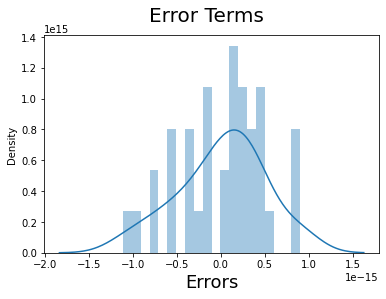

In [225]:
y_train_cnt = HA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

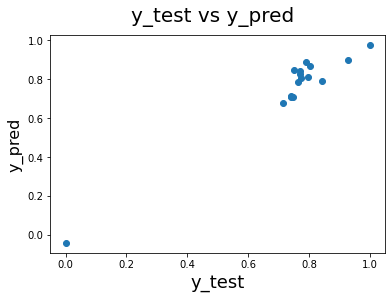

In [226]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Multiplicative Model

In [227]:
#Creating Multiplicative model dataset
HA_MM = HA_Week[HA_Week.columns]

In [228]:
#Taking log
HA_MM = HA_MM.applymap(lambda x: np.log(x))
HA_MM = HA_MM.replace([np.inf, -np.inf], 0)
HA_MM = HA_MM.replace(np.nan, 0)

In [229]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
HA_train, HA_test = train_test_split(HA_MM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

HA_train[HA_train.columns] = scaler.fit_transform(HA_train[HA_train.columns])

HA_test[HA_test.columns] = scaler.fit_transform(HA_test[HA_test.columns])

In [231]:
y_train = HA_train.pop('gmv')
X_train = HA_train

y_test = HA_test.pop('gmv')
X_test = HA_test

In [232]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

HA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = HA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.9647705838802509
Mean Squared Error: 0.0019490211791807336


In [233]:
#Building model using K-fold cross validation

y_HA = HA_MM.pop('gmv')
X_HA = HA_MM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

HA_Model_Cross_Validation = LinearRegression().fit(X_HA, y_HA)
HA_Model_Predict_Cross_Validation = cross_val_predict(HA_Model_Cross_Validation, X_HA, y_HA, cv=10)
Accuracy = metrics.r2_score(y_HA, HA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_HA, HA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.9999026745829721
Mean Squared Error: 0.00030698815298949467


In [234]:
print('Constant:',HA_Model.intercept_)

Constant: -0.14084843725802754


In [235]:
HA_Multiplicative_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(HA_Model.coef_)})
HA_Multiplicative_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
HA_Multiplicative_Model.head(10)

Feature  Coefficients
5                                List_price      0.311696
3                               product_mrp      0.253937
17                              Stock Index      0.197247
16                                      NPS      0.167632
12                              Sponsorship      0.105818
9                           Premium Product      0.104366
2                                       sla      0.100738
27  product_analytic_vertical_VoiceRecorder      0.090246
33                                  MA2_NPS      0.063688
18        product_analytic_vertical_BoomBox      0.059956

Text(0.5, 0, 'Errors')

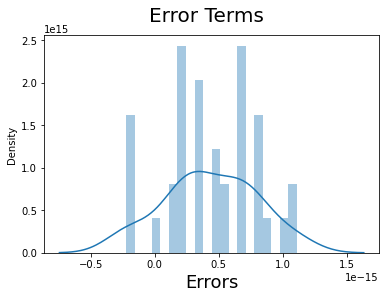

In [236]:
y_train_cnt = HA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

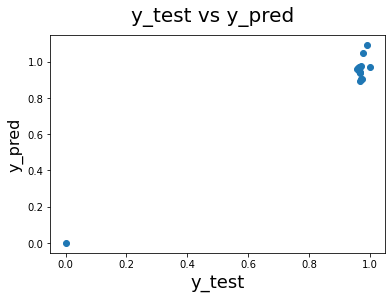

In [237]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Koyck Model

In [238]:
#Creating Kyock model dataset
HA_KM = HA_Week[HA_Week.columns]

In [239]:
#Creating lag variable for GMV
HA_KM['lag_1_gmv'] = HA_KM['gmv'].shift(1).fillna(0)

In [240]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
HA_train, HA_test = train_test_split(HA_KM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

HA_train[HA_train.columns] = scaler.fit_transform(HA_train[HA_train.columns])

HA_test[HA_test.columns] = scaler.fit_transform(HA_test[HA_test.columns])

In [242]:
y_train = HA_train.pop('gmv')
X_train = HA_train

y_test = HA_test.pop('gmv')
X_test = HA_test

In [243]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

HA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = HA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.9703761275942998
Mean Squared Error: 0.001248663774498534


In [244]:
#Building model using K-fold cross validation

y_HA = HA_KM.pop('gmv')
X_HA = HA_KM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

HA_Model_Cross_Validation = LinearRegression().fit(X_HA, y_HA)
HA_Model_Predict_Cross_Validation = cross_val_predict(HA_Model_Cross_Validation, X_HA, y_HA, cv=10)
Accuracy = metrics.r2_score(y_HA, HA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_HA, HA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.5281680488028357
Mean Squared Error: 130055.32405707298


In [245]:
print('Constant:',HA_Model.intercept_)

Constant: -0.037125303014635014


In [246]:
HA_Koyck_Model = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(HA_Model.coef_)})
HA_Koyck_Model.sort_values(by='Coefficients',ascending=False,inplace=True)
HA_Koyck_Model.head(10)

Feature  Coefficients
5                List_price      0.628695
3               product_mrp      0.185374
33                  MA2_NPS      0.162242
16                      NPS      0.140997
4   product_procurement_sla      0.124494
12              Sponsorship      0.094971
37                  MA4_NPS      0.086035
13        Content Marketing      0.067859
0                     units      0.067091
17              Stock Index      0.059313

In [247]:
#Total effect on KPI from Koyck model

#Coefficient of lag variable
HA_Koyck_Model[HA_Koyck_Model.Feature == 'lag_1_gmv'].Coefficients


39   -0.038856
Name: Coefficients, dtype: float64

In [248]:
HA_Koyck_Model['Total Effect'] = HA_Koyck_Model.Coefficients/(1-(-0.032367))
HA_Koyck_Model.head(10)

Feature  Coefficients  Total Effect
5                List_price      0.628695      0.608984
3               product_mrp      0.185374      0.179562
33                  MA2_NPS      0.162242      0.157156
16                      NPS      0.140997      0.136577
4   product_procurement_sla      0.124494      0.120591
12              Sponsorship      0.094971      0.091993
37                  MA4_NPS      0.086035      0.083337
13        Content Marketing      0.067859      0.065731
0                     units      0.067091      0.064987
17              Stock Index      0.059313      0.057453

Text(0.5, 0, 'Errors')

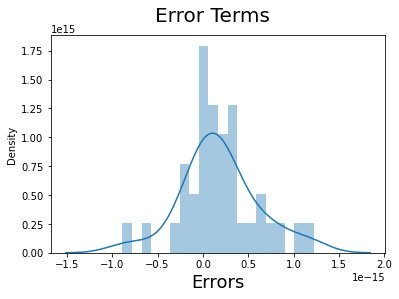

In [249]:
y_train_cnt = HA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

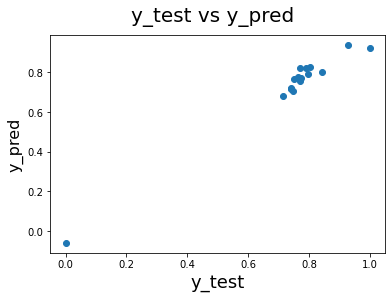

In [250]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Distributive lag model - Additive

In [251]:
#Creating Liner model dataset
HA_DLM_AM = HA_Week[HA_Week.columns]

In [252]:
#Creating lag function for all the variables for 3 weeks

def Lag_Function(Table,columns,n):
    for i in columns:
        Index = Table.columns.get_loc(i) + 1
        Table.insert(loc=Index,column= 'lag_'+np.str(n)+'_'+i,value=Table[i].shift(n))
    return Table

HA_DLM_AM = Lag_Function(HA_DLM_AM,HA_DLM_AM.columns,1)
HA_DLM_AM = Lag_Function(HA_DLM_AM,HA_DLM_AM.columns,2)
HA_DLM_AM = Lag_Function(HA_DLM_AM,HA_DLM_AM.columns,3)
HA_DLM_AM.fillna(0, inplace = True)

In [253]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
HA_train, HA_test = train_test_split(HA_DLM_AM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [254]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

HA_train[HA_train.columns] = scaler.fit_transform(HA_train[HA_train.columns])

HA_test[HA_test.columns] = scaler.fit_transform(HA_test[HA_test.columns])

In [255]:
y_train = HA_train.pop('gmv')
X_train = HA_train

y_test = HA_test.pop('gmv')
X_test = HA_test

In [256]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

HA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = HA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.36748676224097787
Mean Squared Error: 0.02666080774532692


In [257]:
#Building model using K-fold cross validation

y_HA = HA_DLM_AM.pop('gmv')
X_HA = HA_DLM_AM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

HA_Model_Cross_Validation = LinearRegression().fit(X_HA, y_HA)
HA_Model_Predict_Cross_Validation = cross_val_predict(HA_Model_Cross_Validation, X_HA, y_HA, cv=10)
Accuracy = metrics.r2_score(y_HA, HA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_HA, HA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: 0.9102432421615237
Mean Squared Error: 24740.46998592792


In [258]:
print('Constant:',HA_Model.intercept_)

Constant: 0.32655092176580164


In [259]:
HA_Distributive_Lag_Model_Additive = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(HA_Model.coef_)})
HA_Distributive_Lag_Model_Additive.sort_values(by='Coefficients',ascending=False,inplace=True)
HA_Distributive_Lag_Model_Additive.head(10)

Feature  Coefficients
47                                   List_price      0.054046
7                                         units      0.049055
31                                  product_mrp      0.047979
143                                 Stock Index      0.047489
191  product_analytic_vertical_HomeAudioSpeaker      0.046260
135                                         NPS      0.046204
39                      product_procurement_sla      0.046069
55                                     Discount      0.037663
23                                          sla      0.037278
151           product_analytic_vertical_BoomBox      0.033600

Text(0.5, 0, 'Errors')

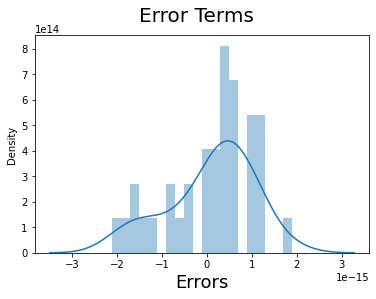

In [260]:
y_train_cnt = HA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

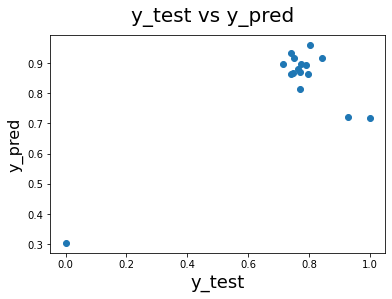

In [261]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## -> Distributive lag model - Multiplicative

In [262]:
#Creating Liner model dataset
HA_DLM_MM = HA_Week[HA_Week.columns]

In [263]:
#Creating lag function for all the variables for 3 weeks

def Lag_Function(Table,columns,n):
    for i in columns:
        Index = Table.columns.get_loc(i) + 1
        Table.insert(loc=Index,column= 'lag_'+np.str(n)+'_'+i,value=Table[i].shift(n))
    return Table

HA_DLM_MM = Lag_Function(HA_DLM_MM,HA_DLM_MM.columns,1)
HA_DLM_MM = Lag_Function(HA_DLM_MM,HA_DLM_MM.columns,2)
HA_DLM_MM = Lag_Function(HA_DLM_MM,HA_DLM_MM.columns,3)
HA_DLM_MM.fillna(0, inplace = True)

In [264]:
#Taking log
HA_DLM_MM = HA_DLM_MM.applymap(lambda x: np.log(x))
HA_DLM_MM = HA_DLM_MM.replace([np.inf, -np.inf], 0)
HA_DLM_MM = HA_DLM_MM.replace(np.nan, 0)

In [265]:
#Splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split

np.random.seed(0)
HA_train, HA_test = train_test_split(HA_DLM_MM, train_size = 0.7, test_size = 0.3, random_state = 100)

In [266]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

HA_train[HA_train.columns] = scaler.fit_transform(HA_train[HA_train.columns])

HA_test[HA_test.columns] = scaler.fit_transform(HA_test[HA_test.columns])

In [267]:
y_train = HA_train.pop('gmv')
X_train = HA_train

y_test = HA_test.pop('gmv')
X_test = HA_test

In [268]:
#Building Liner Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

HA_Model = LinearRegression().fit(X_train,y_train)
y_test_pred = HA_Model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test,y_test_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_test_pred)))

R2 Score: 0.6799718444666076
Mean Squared Error: 0.017705137404166852


In [269]:
#Building model using K-fold cross validation

y_HA = HA_DLM_MM.pop('gmv')
X_HA = HA_DLM_MM

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

HA_Model_Cross_Validation = LinearRegression().fit(X_HA, y_HA)
HA_Model_Predict_Cross_Validation = cross_val_predict(HA_Model_Cross_Validation, X_HA, y_HA, cv=10)
Accuracy = metrics.r2_score(y_HA, HA_Model_Predict_Cross_Validation)
print("Cross-Validation Accuracy:", Accuracy)
print("Mean Squared Error: {}".format(mean_squared_error(y_HA, HA_Model_Predict_Cross_Validation)))

Cross-Validation Accuracy: -0.2943420077517702
Mean Squared Error: 4.082671047610503


In [270]:
print('Constant:',HA_Model.intercept_)

Constant: 0.6893022744643298


In [271]:
HA_Distributive_Lag_Model_Multiplicative = pd.DataFrame({"Feature":X_test.columns,"Coefficients":np.transpose(HA_Model.coef_)})
HA_Distributive_Lag_Model_Multiplicative.sort_values(by='Coefficients',ascending=False,inplace=True)
HA_Distributive_Lag_Model_Multiplicative.head(10)

Feature  Coefficients
23                          sla      0.036610
135                         NPS      0.035875
47                   List_price      0.035867
55                     Discount      0.035551
39      product_procurement_sla      0.034582
31                  product_mrp      0.034305
143                 Stock Index      0.034161
95             Total Investment      0.032816
15   order_payment_type_Prepaid      0.028825
103                 Sponsorship      0.026966

Text(0.5, 0, 'Errors')

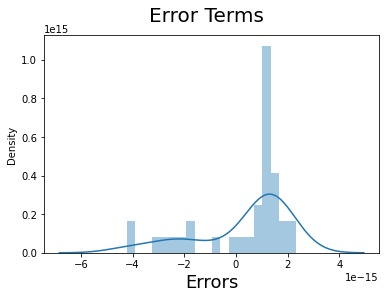

In [272]:
y_train_cnt = HA_Model.predict(X_train)
# Plot the histogram of the error terms
z = y_train - y_train_cnt
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

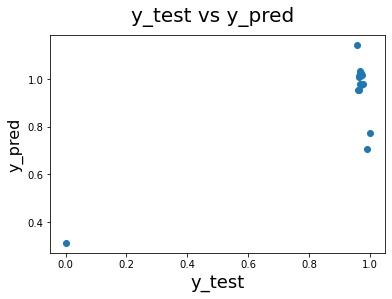

In [273]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# -> Model Selection

|Category|Linear Regression Models|Cross Validation|R-square|MSE|
|--------------------|-----------------------|----------------|------------------------|-----------------|
|<font color = GREEN>Camera Accessory</font>|Additive Model|No|0.88|0.01|
|||Yes|0.92|8402.00|
||Multiplicative Model|No|0.59|0.03|
|||Yes|0.89|0.11|
||Koyck Model|No|<font color = blue>0.92<font color = blue>|<font color = blue>0.01<font color = blue>|
|||Yes|0.95|5473.12|
||Distributive Lag Model - Additive|No|0.54|0.03|
|||Yes|0.73|27227.23|
||Distributive Lag Model - Multiplicaitive|No|0.24|0.05|
|||Yes|-0.12|1.14|
|<font color = GREEN>Gaming Accessory</font>|Additive Model|No|<font color = blue>0.94<font color = blue>|<font color = blue>0.01<font color = blue>|
|||Yes|0.55|11365.23|
||Multiplicative Model|No|0.81|0.01|
|||Yes|-0.35|0.06|
||Koyck Model|No|0.74|0.02|
|||Yes|-0.88|48110.67|
||Distributive Lag Model - Additive|No|-0.61|0.11|
|||Yes|-0.39|35477.35|
||Distributive Lag Model - Multiplicaitive|No|-0.69|0.10|
|||Yes|-0.79|0.08|
|<font color = GREEN>Home Audio</font>|Additive Model|No|0.94|0.01|
|||Yes|0.53|128711.89|
||Multiplicative Model|No|0.96|0.00|
|||Yes|0.99|0.00|
||Koyck Model|No|<font color = blue>0.97<font color = blue>|<font color = blue>0.00<font color = blue>|
|||Yes|0.52|130055.32|
||Distributive Lag Model - Additive|No|0.37|0.03|
|||Yes|0.91|24740.47|
||Distributive Lag Model - Multiplicaitive|No|0.68|0.02|
|||Yes|-0.30|4.08|

Model has been selected on the basis of R-Square and MSE value.

# -> Model Equations

Considering top 5 KPIs from the models of our 3 product sub categories. 

## Camera Accessory Model Equation

We are selecting Koyck model since it has best R-Square value and least Mean squared error.

In [274]:
CA_Koyck_Model.head(5)

Feature  Coefficients  Total Effect
6         List_price      0.390183      0.377950
10   Premium Product      0.249848      0.242015
4        product_mrp      0.229699      0.222498
43     Max Temp (°C)      0.209587      0.203016
15  Online marketing      0.153922      0.149096

Revenue = <font color = red> (0.37 x List_price) + (0.22 x product_mrp) + (0.24 x Premium Product) + (0.20 x Max Temp (°C)) + (0.15 x Online marketing)<font color = red>

## Gaming Accessory Model Equation

We are selecting Additive model since it has best R-Square value and least Mean squared error.

In [275]:
GA_Linear_Model.head(5)

Feature  Coefficients
6                                 List_price      0.712359
4                                product_mrp      0.216199
27  product_analytic_vertical_GamingKeyboard      0.168923
15                          Online marketing      0.149934
10                           Premium Product      0.082117

Revenue = <font color = red>0.14 + (0.71 x List_price) + (0.22 x product_mrp) + (0.17 x product_analytic_vertical_GamingKeyboard) + (0.15 x Online marketing) + (0.08 x Premium Product)<font color = red>

## Home Audio Model Equation

We are selecting Koyck model since it has best R-Square value and least Mean squared error.

In [276]:
HA_Koyck_Model.head(5)

Feature  Coefficients  Total Effect
5                List_price      0.628695      0.608984
3               product_mrp      0.185374      0.179562
33                  MA2_NPS      0.162242      0.157156
16                      NPS      0.140997      0.136577
4   product_procurement_sla      0.124494      0.120591

Revenue = <font color = red>-0.03 + (0.61 x List_price) + (0.18 x product_mrp) + (0.16 x MA2_NPS) + (0.14 x NPS) + (0.12 x product_procurement_sla)<font color = red>

# -> Recommendation

### <font color = green>Camera Accessory:</font>

*   Company should promote `Binoculars`,`Camera Battery`,`CameraMount` and `CameraRemoteControl` as they can fetch the highest revenue.
*   Online Marketing can we use more to achieve high revenue than other media platforms.
*   These Premium products impacts the revenue a lot. One unit of these premium products can boost the revenue by 0.24 units.
*   Good Stock index can be seen having impact on it even after 3 weeks.

### <font color = green>Gaming Accessory:</font>

*   Company should promote `GamingKeyboard`,`GameControlMount`,`GamingChargingStation` and `GamePad` as they can fetch the highest revenue.
*   These Premium products impacts the revenue a lot. One unit of these premium products can boost the revenue by 0.08 units.
*   Online Marketing can we use more to achieve high revenue than other media platforms.
*   Good Stock index and NPS ratings can be seen having impact on it even after 3 weeks.

### <font color = green>Home Audio:</font>

*   Company should promote `HomeAudioSpeaker` and `DockingStation` as they can fetch the highest revenue.
*   Sponsorship can we use more to achieve high revenue than other media platforms.
*   Good NPS ratings can be seen having impact on it even after 2-4 weeks.
*   It's revenue depends upon SLA a lot so more revenue can be generated if supply chain is improved more for it.


### <font color = green>Conclusion:</font> 

 - Most of the sales takes place whe the discount percentage is between 50-60% but that doesn't necessarily helps in boosting the revenue. our analysis shows that discount percentage between 10-20% is the most profitable for the company especially among the luxury items.

- During the festive time like Thanksgiving, more investment is made on advertisements and good promotional offers were given that helps in increasing the revenue.

- Discounts without the proper advertisement on media channels is not helpful.